<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/dacon_movie/movie_audience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DACON 영화 관객수 예측 경진대회

대회 사이트: https://dacon.io/competitions/open/235536/overview/description

# 목차
### 0. 데이터 로드
### 1. 데이터 EDA, visualization
### 2. 데이터 전처리
### 3. 모델 생성 및 학습
### 4. 결론

* 참고

https://dacon.io/competitions/open/235536/codeshare/4158?page=1&dtype=recent
https://dacon.io/competitions/open/235536/codeshare/2721?page=1&dtype=recent

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,838 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 0.데이터로드

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!cp /gdrive/MyDrive/Dacon_study/movie/movies_test.csv ./
!cp /gdrive/MyDrive/Dacon_study/movie/movies_train.csv ./
!cp /gdrive/MyDrive/Dacon_study/movie/submission.csv ./

In [ ]:
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


* title: 영화 제목
* distributor: 배급사
* genre : 장르
* release_time: 개봉일
* time: 상영시간(분)
* screening_rat : 상영등급
* director: 감독이름
* dir_prev_bfnum : 해당감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dif_prev_num : 해당감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단, 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor: 주연배우수
* box_off_num: 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
print(train.shape)
print(test.shape)

(600, 12)
(243, 11)


데이터 개수가 적은 편

# 1.데이터 EDA, visualization

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


## Data Cleansing

In [ ]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

dir_prev_bfnum(영화 만들기 전 감독 평균 관객수)의 null값이 train, test데이터의 절반이상 차지

In [ ]:
# null값 많은 dir_prev_bfnum 삭제
train = train.drop('dir_prev_bfnum',axis=1)
test = test.drop('dir_prev_bfnum',axis=1)

In [ ]:
# release_time 데이터 타입 datetime으로 변경
train['release_time'] = pd.to_datetime(train['release_time'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          600 non-null    object        
 1   distributor    600 non-null    object        
 2   genre          600 non-null    object        
 3   release_time   600 non-null    datetime64[ns]
 4   time           600 non-null    int64         
 5   screening_rat  600 non-null    object        
 6   director       600 non-null    object        
 7   dir_prev_num   600 non-null    int64         
 8   num_staff      600 non-null    int64         
 9   num_actor      600 non-null    int64         
 10  box_off_num    600 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 51.7+ KB


In [ ]:
# 년도, 월 추출
train['release_year'], train['release_month'] = (train['release_time'].dt.year, train['release_time'].dt.month)
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2,20,6,217866,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,251,2,483387,2010,11


In [ ]:
# release_time 데이터 타입 datetime으로 변경
test['release_time'] = pd.to_datetime(test['release_time'])

# 년도, 월 추출
test['release_year'], test['release_month'] = (test['release_time'].dt.year, test['release_time'].dt.month)

## 시각화

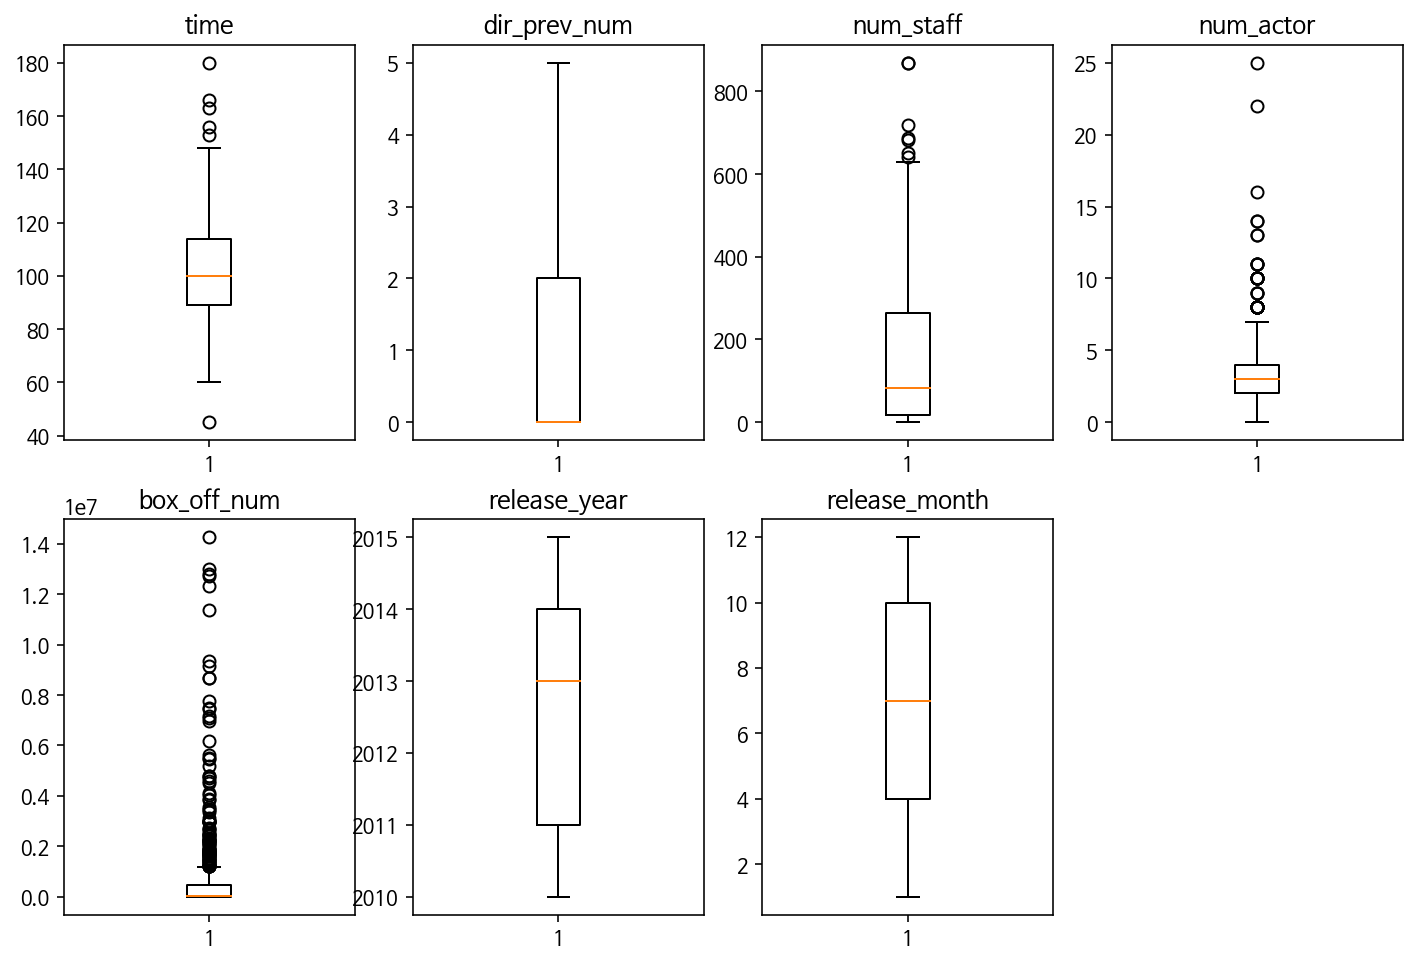

In [ ]:
# boxplot으로 수치 데이터 분포 확인
plt.figure(figsize=(12,8))

cols = train.columns[7:].insert(0,'time')
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title(cols[i])
  plt.boxplot(train[cols[i]])
plt.show()

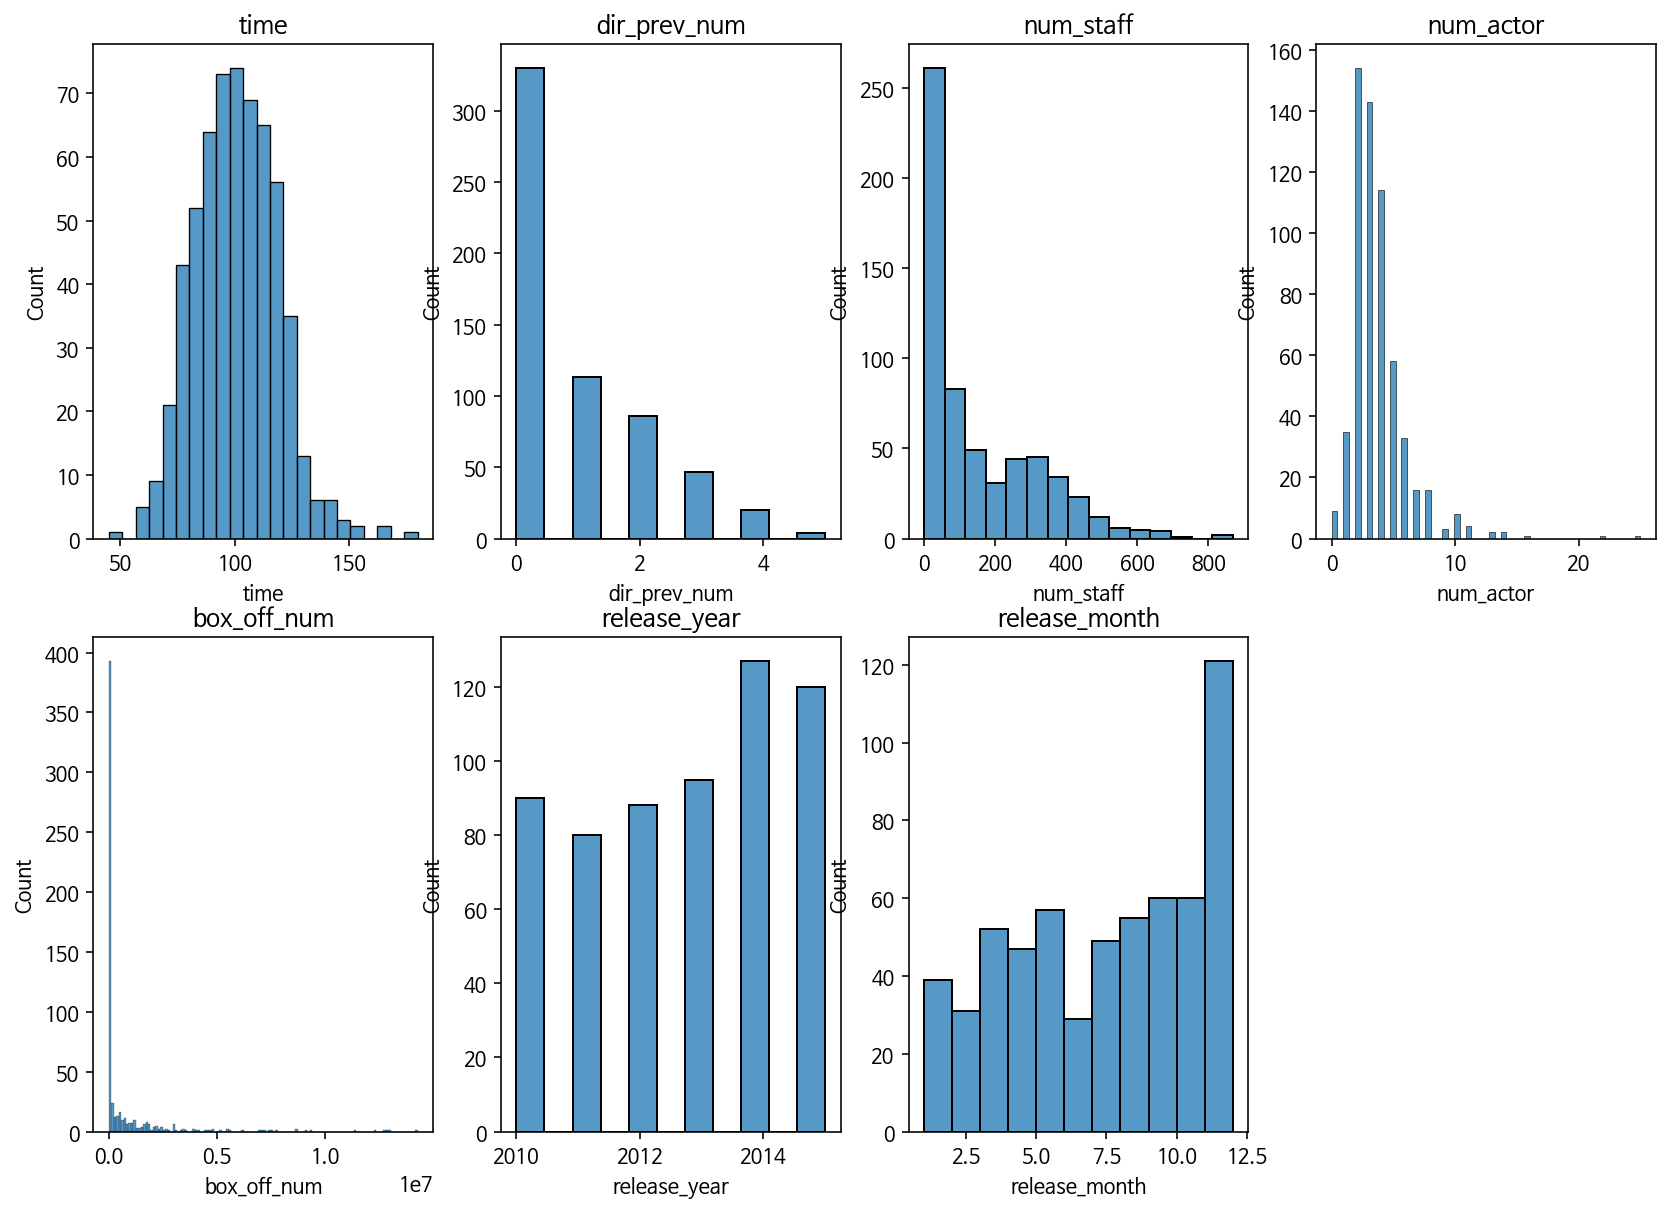

In [ ]:
# histplot으로 수치형 데이터 분포 확인
plt.figure(figsize=(14,10))

cols = train.columns[7:].insert(0,'time')
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title(cols[i])
  sns.histplot(train[cols[i]])
plt.show()

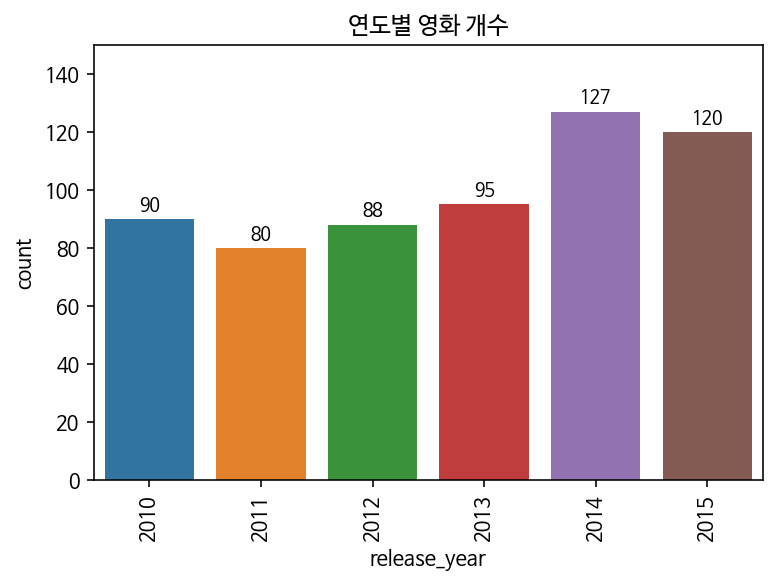

In [ ]:
ax= sns.countplot(x='release_year',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,150)
plt.xticks(rotation=90)

plt.title('연도별 영화 개수')
plt.show()

연도별 영화 개수는 점차 늘어나는 추세

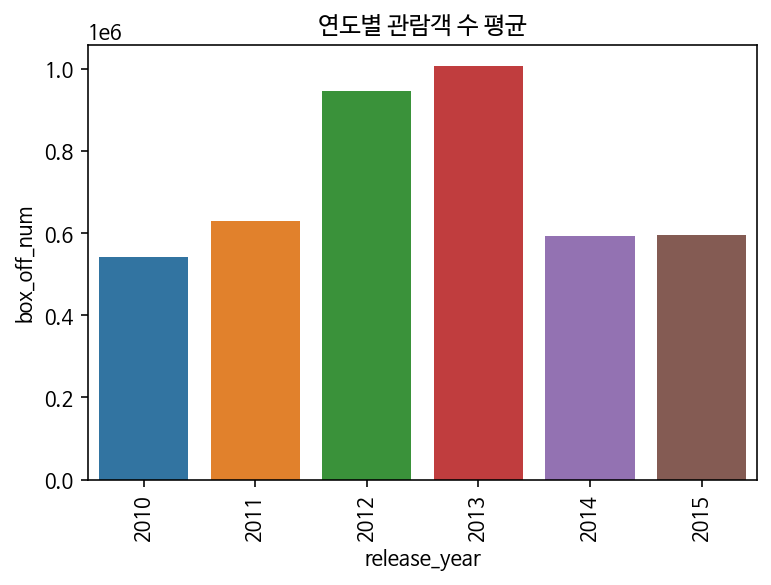

In [ ]:
plt.figure()
sns.barplot(x='release_year',y='box_off_num', data=train.groupby('release_year')['box_off_num'].mean().reset_index())
plt.title('연도별 관람객 수 평균')
plt.show()

연도별 관람객은 2012, 2013년까지 정점을 찍고 2014년 부터 약간 감소

In [ ]:
train['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

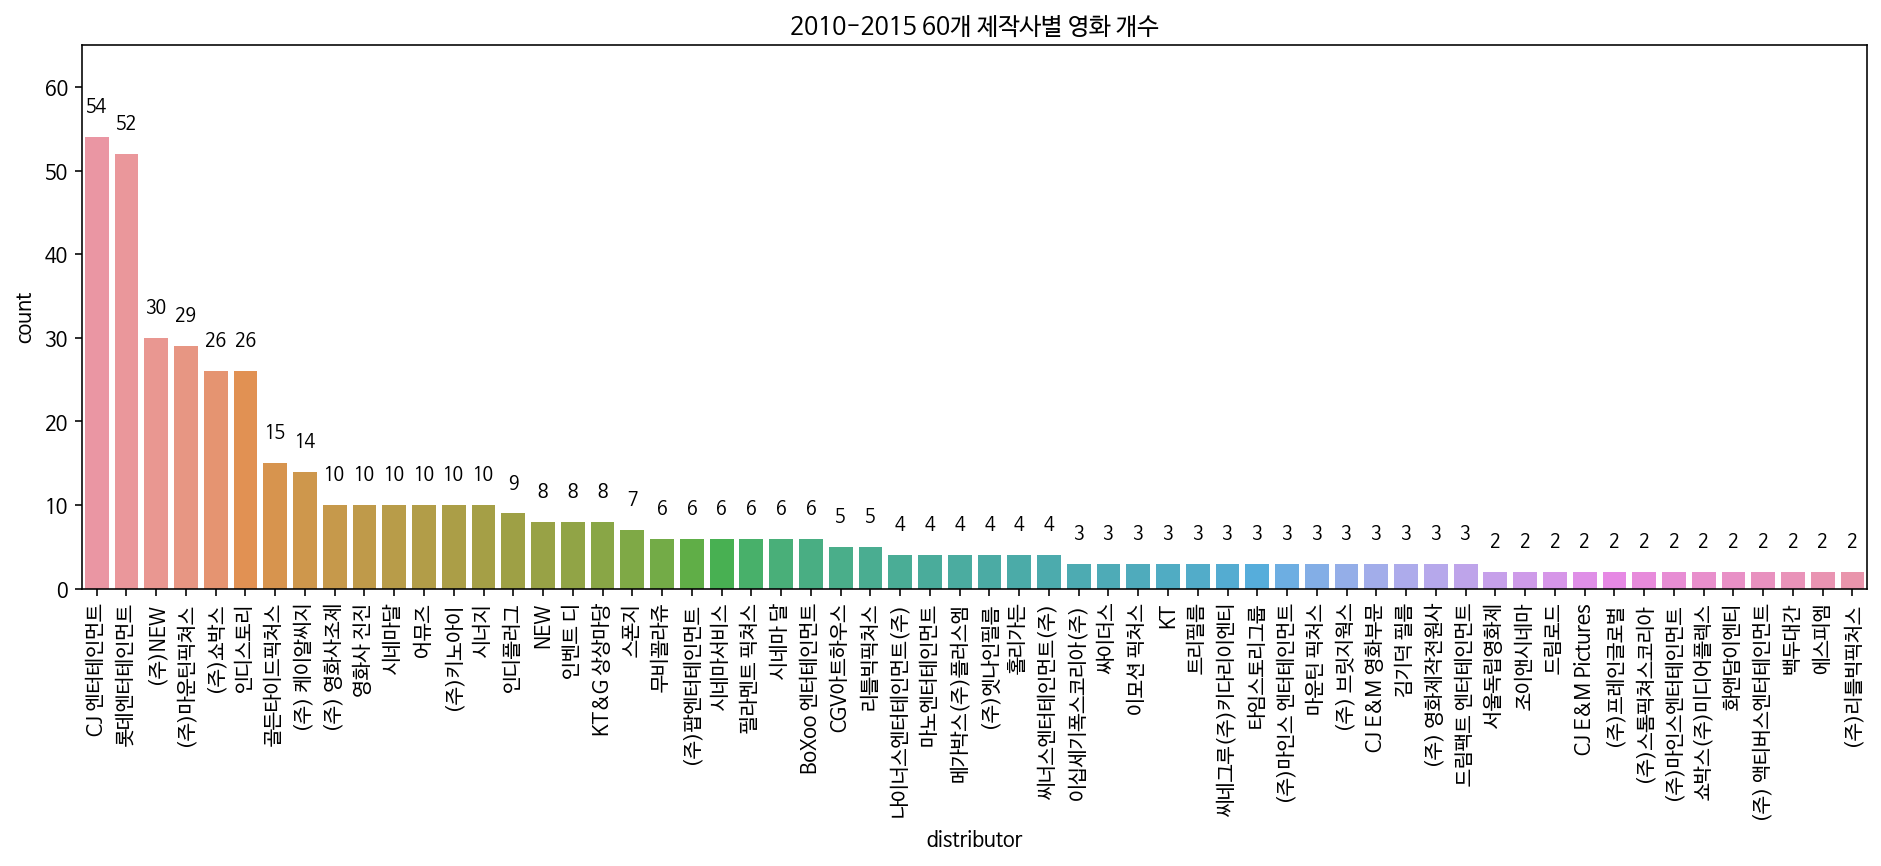

In [ ]:
plt.figure(figsize=(16,5))
ax= sns.countplot(x='distributor',data=train, order=train['distributor'].value_counts().head(60).index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,65)
plt.xticks(rotation=90)

plt.title('2010-2015 60개 제작사별 영화 개수')
plt.show()

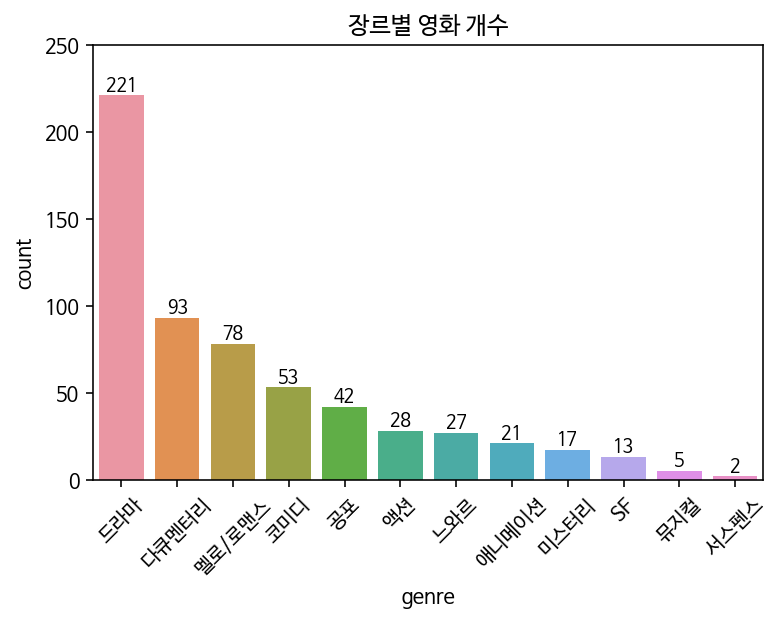

In [ ]:
ax= sns.countplot(x='genre',data=train, order=train['genre'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,250)
plt.xticks(rotation=45)

plt.title('장르별 영화 개수')
plt.show()

드라마 장르가 가장 많다

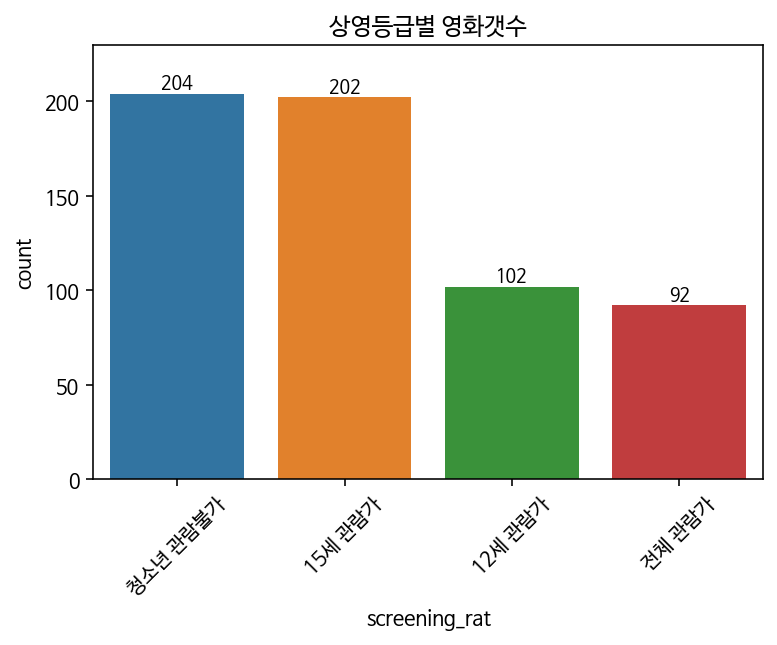

In [ ]:
ax= sns.countplot(x='screening_rat',data=train, order=train['screening_rat'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,230)
plt.xticks(rotation=45)

plt.title('상영등급별 영화갯수')
plt.show()

청소년 관람불가, 15세 관람가가 가장 많다

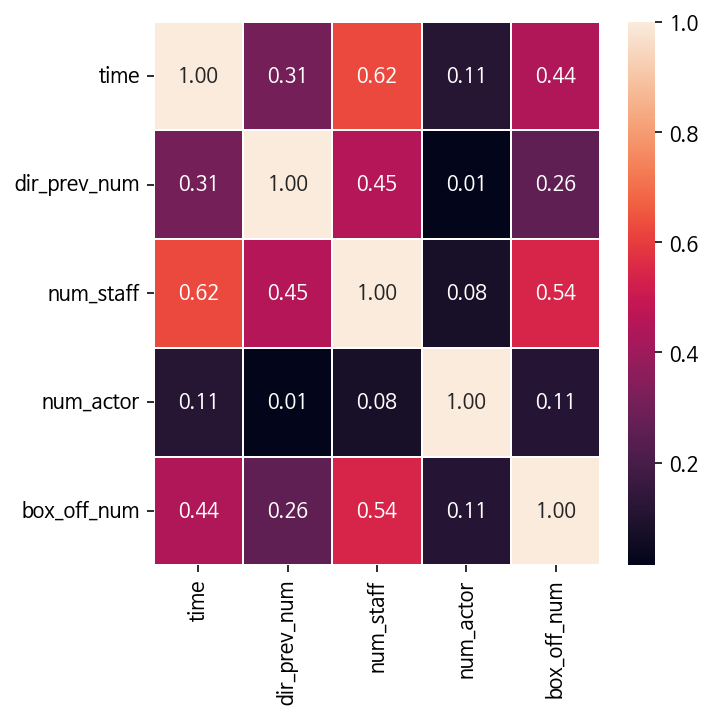

In [ ]:
# 상관계수
plt.figure(figsize=(5,5))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5)

* 관객수(box_off_num)에 주연배수 수(num_actor)는 많은 영향을 주지 않는다. num_actor는 다른 변수와도 상관관계가 낮음.


* 수치형 변수 간 상관관계만 확인한 거라 카테고리형 변수인 상영등급, 장르 포함 상관관계는 알 수 없음 



# 2.데이터 전처리

## feature engineering

In [ ]:
train['distributor'] = train.distributor.str.replace("(주)",'')
test['distributor'] = test.distributor.str.replace("(주)", '')

In [ ]:
import re
train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]

In [ ]:
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [ ]:
train['distributor'] = train.distributor.apply(get_dis)
test['distributor'] = test.distributor.apply(get_dis)

In [ ]:
tr_nm_rank = train.groupby('distributor').box_off_num.median().reset_index(name = 'dis_rank').sort_values(by = 'dis_rank')
tr_nm_rank

,distributor,dis_rank
110,인피니티엔터테인먼트,2.0
15,고구마공작소,8.0
52,사람과사람들,42.0
97,위드시네마,46.0
19,나우콘텐츠,54.0
...,...,...
113,전망좋은영화사,1214237.0
105,이십세기폭스코리아,1422844.0
56,쇼박스,2138560.0
84,영구아트무비,2541603.0


In [ ]:
tr_nm_rank['dis_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]

In [ ]:
train = pd.merge(train, tr_nm_rank, how = 'left')

In [ ]:
test = pd.merge(test, tr_nm_rank, how = 'left')

## 라벨인코딩

In [ ]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(train['screening_rat'])
train['screening_rat'] = encoder.transform(train['screening_rat'])
test['screening_rat'] = encoder.transform(test['screening_rat'])

In [ ]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,dis_rank,genre_rank
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,3,조병옥,0,91,2,23398,2012,11,134,11
1,내부자들,쇼박스,느와르,2015-11-19,130,3,우민호,2,387,3,7072501,2015,11,145,12
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,1,장철수,4,343,4,6959083,2013,6,145,11
3,나는 공무원이다,NEW,코미디,2012-07-12,101,2,구자홍,2,20,6,217866,2012,7,140,9
4,불량남녀,쇼박스,코미디,2010-11-04,108,1,신근호,1,251,2,483387,2010,11,145,9


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,release_year,release_month,dis_rank,genre_rank
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,3,김형준,2,304,3,2010,1,132.0,12
1,아빠가 여자를 좋아해,쇼박스,멜로/로맨스,2010-01-14,113,0,이광재,4,275,3,2010,1,145.0,5
2,하모니,CJ,드라마,2010-01-28,115,0,강대규,3,419,7,2010,1,141.0,8
3,의형제,쇼박스,액션,2010-02-04,116,1,장훈,2,408,2,2010,2,145.0,11
4,평행 이론,CJ,공포,2010-02-18,110,1,권호영,1,380,1,2010,2,141.0,7


# 3.모델 생성 및 학습

## train, val 데이터셋 split

In [ ]:
X= train.drop(['title','release_time','director','box_off_num','genre','distributor'],axis=1)
y=train['box_off_num']

In [ ]:
X.head()

,time,screening_rat,dir_prev_num,num_staff,num_actor,release_year,release_month,dis_rank,genre_rank
0,96,3,0,91,2,2012,11,134,11
1,130,3,2,387,3,2015,11,145,12
2,123,1,4,343,4,2013,6,145,11
3,101,2,2,20,6,2012,7,140,9
4,108,1,1,251,2,2010,11,145,9


In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X,y,test_size=.25, random_state=42)

# RandomForest

## 학습

In [ ]:
# 모델링 라이브러리
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_reg= RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(train_x,train_y)
pred= rf_reg.predict(val_x)

mse = mean_squared_error(val_y,pred)
rmse = mse**(1/2)

print("RMSE: ",rmse)

RMSE:  1221278.81895708


## 하이퍼파라미터 튜닝 - optuna

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.2 MB/s 
     |████████████████████████████████| 81 kB 8.4 MB/s 
     |████████████████████████████████| 209 kB 73.4 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 147 kB 51.7 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 112 kB 69.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=84f537a22f0a958c433182ce1749936cc484949dc5732b7a5e3f4fb0f5581109
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [ ]:
# Optuna Libraries
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [ ]:
# random sampler
sampler = TPESampler(seed=10)

def objective(trial):

  rf_param = {
      'max_depth':trial.suggest_int('max_depth', 1, 10),
      'max_leaf_nodes':trial.suggest_int('max_leaf_nodes', 2, 1000),
      'n_estimators':trial.suggest_int('n_estimators', 100, 500),
  }
  
  model_rf = RandomForestRegressor(**rf_param)
    
  model_rf = model_rf.fit(train_x, train_y)    
  
  # 평가지표
  MSE = mean_squared_error(val_y, model_rf.predict(val_x))

  return MSE
  
optuna_rf = optuna.create_study(direction='minimize',sampler = sampler)

optuna_rf.optimize(objective, n_trials=100)

[I 2022-12-06 01:24:39,216] A new study created in memory with name: no-name-c703e914-c47e-47ee-95f2-add9ab46499d
[I 2022-12-06 01:24:39,824] Trial 0 finished with value: 1429375982499.063 and parameters: {'max_depth': 8, 'max_leaf_nodes': 22, 'n_estimators': 354}. Best is trial 0 with value: 1429375982499.063.
[I 2022-12-06 01:24:40,236] Trial 1 finished with value: 1452474384806.6633 and parameters: {'max_depth': 8, 'max_leaf_nodes': 500, 'n_estimators': 190}. Best is trial 0 with value: 1429375982499.063.
[I 2022-12-06 01:24:40,482] Trial 2 finished with value: 1056357205444.1106 and parameters: {'max_depth': 2, 'max_leaf_nodes': 761, 'n_estimators': 167}. Best is trial 2 with value: 1056357205444.1106.
[I 2022-12-06 01:24:41,146] Trial 3 finished with value: 1143050430602.9746 and parameters: {'max_depth': 1, 'max_leaf_nodes': 686, 'n_estimators': 482}. Best is trial 2 with value: 1056357205444.1106.
[I 2022-12-06 01:24:41,703] Trial 4 finished with value: 1133277729711.0588 and pa

In [ ]:
rf_trial = optuna_rf.best_trial
rf_trial_params = rf_trial.params
print('Best Trial: score {},\nparams {}'.format(rf_trial.value, rf_trial_params))

Best Trial: score 1011126487159.169,
params {'max_depth': 2, 'max_leaf_nodes': 73, 'n_estimators': 268}


In [ ]:
# Modeling fit
rf_regop = RandomForestRegressor(**rf_trial_params)
rf_study = rf_regop.fit(train_x, train_y)

rf_pred_op = rf_regop.predict(val_x)
mse= mean_squared_error(val_y,rf_pred_op)
rmse= mse**(1/2)

print("RMSE : ", rmse)

RMSE :  1017287.6221849467


# catboost

## 학습

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
# 모델링 라이브러리
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
cat_reg = CatBoostRegressor(n_estimators=200, random_state=42)

cat_reg.fit(train_x,train_y)
pred = cat_reg.predict(val_x)
mse = mean_squared_error(val_y,pred)
rmse = mse**(1/2)

print("RMSE: ",rmse)

Learning rate set to 0.133552
0:	learn: 1883103.4379354	total: 47.5ms	remaining: 9.44s
1:	learn: 1798285.3581718	total: 48.7ms	remaining: 4.82s
2:	learn: 1687451.3728729	total: 50ms	remaining: 3.28s
3:	learn: 1617714.1173803	total: 50.9ms	remaining: 2.49s
4:	learn: 1550148.0504079	total: 52ms	remaining: 2.03s
5:	learn: 1499810.8396376	total: 53.1ms	remaining: 1.72s
6:	learn: 1453559.6761205	total: 54.2ms	remaining: 1.49s
7:	learn: 1396536.0123710	total: 55.3ms	remaining: 1.33s
8:	learn: 1353280.8846238	total: 56.4ms	remaining: 1.2s
9:	learn: 1308897.9287106	total: 57.5ms	remaining: 1.09s
10:	learn: 1272220.5146373	total: 58.7ms	remaining: 1.01s
11:	learn: 1234857.0217701	total: 59.7ms	remaining: 935ms
12:	learn: 1206280.4919687	total: 60.7ms	remaining: 874ms
13:	learn: 1175213.8454017	total: 64.1ms	remaining: 851ms
14:	learn: 1146369.6926682	total: 65.3ms	remaining: 805ms
15:	learn: 1111926.4269107	total: 66.4ms	remaining: 763ms
16:	learn: 1089230.0926145	total: 67.5ms	remaining: 726ms

## 하이퍼파라미터 튜닝 -optuna

In [ ]:
# random sampler
sampler = TPESampler(seed=10)

def objective(trial):

  cat_param = {
      'max_depth':trial.suggest_int('max_depth', 2, 12),
      'min_child_samples':trial.suggest_int('min_child_samples', 5, 100),
      'n_estimators':trial.suggest_int('n_estimators', 100, 500),
      'learning_rate':trial.suggest_loguniform('learning_rate',0.01,0.3)
  }
  
  model_cat = CatBoostRegressor(**cat_param)
    
  model_cat = model_cat.fit(train_x, train_y)    
  
  # 평가지표
  MSE = mean_squared_error(val_y, model_cat.predict(val_x))

  return MSE
  
optuna_cat = optuna.create_study(direction='minimize',sampler = sampler)

optuna_cat.optimize(objective, n_trials=100)

[I 2022-12-06 01:25:59,053] A new study created in memory with name: no-name-a589730b-fb25-4afe-ab47-eac20dfddc9d


0:	learn: 1892551.1432176	total: 8.65ms	remaining: 3.05s
1:	learn: 1801590.8110057	total: 14.5ms	remaining: 2.55s
2:	learn: 1709756.5166648	total: 18ms	remaining: 2.1s
3:	learn: 1630946.5409134	total: 19.6ms	remaining: 1.71s
4:	learn: 1565393.3449952	total: 23.2ms	remaining: 1.62s
5:	learn: 1507548.2662719	total: 29.5ms	remaining: 1.71s
6:	learn: 1449035.1803594	total: 35.7ms	remaining: 1.77s
7:	learn: 1388633.3109377	total: 46.6ms	remaining: 2.02s
8:	learn: 1346377.0390281	total: 53.1ms	remaining: 2.03s
9:	learn: 1309358.8920450	total: 59.4ms	remaining: 2.04s
10:	learn: 1262792.6291731	total: 65.7ms	remaining: 2.05s
11:	learn: 1221576.4158744	total: 72ms	remaining: 2.05s
12:	learn: 1184445.9547142	total: 78.5ms	remaining: 2.06s
13:	learn: 1149041.6280416	total: 84.9ms	remaining: 2.06s
14:	learn: 1112430.4237166	total: 92ms	remaining: 2.08s
15:	learn: 1073609.6202952	total: 98.4ms	remaining: 2.08s
16:	learn: 1038436.3752339	total: 101ms	remaining: 2s
17:	learn: 1010085.1481717	total: 1

[I 2022-12-06 01:26:01,541] Trial 0 finished with value: 1520794728966.7004 and parameters: {'max_depth': 10, 'min_child_samples': 6, 'n_estimators': 354, 'learning_rate': 0.12766567050674044}. Best is trial 0 with value: 1520794728966.7004.


335:	learn: 14355.0252740	total: 2.19s	remaining: 117ms
336:	learn: 14351.6276792	total: 2.2s	remaining: 111ms
337:	learn: 14203.3679926	total: 2.2s	remaining: 104ms
338:	learn: 13939.7408585	total: 2.21s	remaining: 97.8ms
339:	learn: 13764.3770059	total: 2.22s	remaining: 91.3ms
340:	learn: 13565.8666774	total: 2.22s	remaining: 84.7ms
341:	learn: 13481.2162037	total: 2.23s	remaining: 78.2ms
342:	learn: 13365.7986015	total: 2.23s	remaining: 71.7ms
343:	learn: 13180.8336641	total: 2.24s	remaining: 65.2ms
344:	learn: 13093.1750060	total: 2.25s	remaining: 58.6ms
345:	learn: 13052.1503504	total: 2.25s	remaining: 52.1ms
346:	learn: 12905.3878727	total: 2.26s	remaining: 45.6ms
347:	learn: 12764.1817935	total: 2.27s	remaining: 39.1ms
348:	learn: 12761.8914124	total: 2.27s	remaining: 32.6ms
349:	learn: 12759.4859665	total: 2.28s	remaining: 26.1ms
350:	learn: 12548.5881926	total: 2.29s	remaining: 19.6ms
351:	learn: 12384.6926756	total: 2.31s	remaining: 13.1ms
352:	learn: 12361.7161255	total: 2.3

[I 2022-12-06 01:26:01,883] Trial 1 finished with value: 1831896667938.9282 and parameters: {'max_depth': 7, 'min_child_samples': 26, 'n_estimators': 179, 'learning_rate': 0.13286056037300167}. Best is trial 0 with value: 1520794728966.7004.


122:	learn: 264358.0823686	total: 192ms	remaining: 87.3ms
123:	learn: 260041.7946720	total: 194ms	remaining: 85.9ms
124:	learn: 257746.9916580	total: 197ms	remaining: 85ms
125:	learn: 255182.9710171	total: 198ms	remaining: 83.5ms
126:	learn: 251151.9188538	total: 200ms	remaining: 81.8ms
127:	learn: 248934.6371963	total: 201ms	remaining: 80.2ms
128:	learn: 246030.9709954	total: 203ms	remaining: 78.7ms
129:	learn: 242985.4701234	total: 205ms	remaining: 77.1ms
130:	learn: 241070.4983620	total: 206ms	remaining: 75.5ms
131:	learn: 237900.8118238	total: 208ms	remaining: 73.9ms
132:	learn: 234867.9682248	total: 209ms	remaining: 72.4ms
133:	learn: 232779.4434909	total: 211ms	remaining: 70.8ms
134:	learn: 230564.2038863	total: 212ms	remaining: 69.2ms
135:	learn: 227600.0853173	total: 214ms	remaining: 67.6ms
136:	learn: 225508.5941920	total: 216ms	remaining: 66.1ms
137:	learn: 224419.6756582	total: 217ms	remaining: 64.5ms
138:	learn: 222561.4879241	total: 219ms	remaining: 62.9ms
139:	learn: 2189

[I 2022-12-06 01:26:02,198] Trial 2 finished with value: 1621883695496.4233 and parameters: {'max_depth': 3, 'min_child_samples': 13, 'n_estimators': 374, 'learning_rate': 0.2560221708894264}. Best is trial 0 with value: 1520794728966.7004.


366:	learn: 227302.0457466	total: 237ms	remaining: 4.52ms
367:	learn: 226526.2619103	total: 238ms	remaining: 3.87ms
368:	learn: 226083.9053023	total: 238ms	remaining: 3.23ms
369:	learn: 224720.8201868	total: 239ms	remaining: 2.58ms
370:	learn: 223980.2839269	total: 239ms	remaining: 1.93ms
371:	learn: 222593.1660158	total: 239ms	remaining: 1.29ms
372:	learn: 221306.7734018	total: 240ms	remaining: 642us
373:	learn: 220059.3700407	total: 240ms	remaining: 0us
0:	learn: 1942824.7438561	total: 311us	remaining: 132ms
1:	learn: 1889912.0828047	total: 863us	remaining: 183ms
2:	learn: 1838395.8054343	total: 1.41ms	remaining: 199ms
3:	learn: 1800711.8868168	total: 1.94ms	remaining: 204ms
4:	learn: 1759729.1953861	total: 2.49ms	remaining: 209ms
5:	learn: 1723924.9910793	total: 3ms	remaining: 210ms
6:	learn: 1683354.2779558	total: 3.5ms	remaining: 209ms
7:	learn: 1662485.8721416	total: 4.16ms	remaining: 217ms
8:	learn: 1638249.8703715	total: 4.69ms	remaining: 217ms
9:	learn: 1608672.7611865	total: 

[I 2022-12-06 01:26:02,508] Trial 3 finished with value: 1316494837881.2366 and parameters: {'max_depth': 2, 'min_child_samples': 54, 'n_estimators': 425, 'learning_rate': 0.0803110441567395}. Best is trial 3 with value: 1316494837881.2366.


260:	learn: 965978.2363199	total: 146ms	remaining: 91.7ms
261:	learn: 965169.3563562	total: 146ms	remaining: 91ms
262:	learn: 964747.7050886	total: 147ms	remaining: 90.3ms
263:	learn: 964363.5022475	total: 147ms	remaining: 89.5ms
264:	learn: 963959.0549946	total: 147ms	remaining: 88.8ms
265:	learn: 963158.8030375	total: 147ms	remaining: 88.1ms
266:	learn: 962356.9306912	total: 148ms	remaining: 87.5ms
267:	learn: 961345.6016709	total: 148ms	remaining: 86.8ms
268:	learn: 960754.4056794	total: 149ms	remaining: 86.2ms
269:	learn: 959989.5545004	total: 149ms	remaining: 85.5ms
270:	learn: 959851.8698114	total: 149ms	remaining: 84.8ms
271:	learn: 959180.2475228	total: 149ms	remaining: 84.1ms
272:	learn: 958778.9140327	total: 150ms	remaining: 83.3ms
273:	learn: 957890.4303776	total: 150ms	remaining: 82.7ms
274:	learn: 956348.1301151	total: 150ms	remaining: 82ms
275:	learn: 955606.4943281	total: 151ms	remaining: 81.3ms
276:	learn: 955035.8724107	total: 151ms	remaining: 80.6ms
277:	learn: 954376

[I 2022-12-06 01:26:04,489] Trial 4 finished with value: 1515953744146.8245 and parameters: {'max_depth': 9, 'min_child_samples': 33, 'n_estimators': 468, 'learning_rate': 0.11363577488646587}. Best is trial 3 with value: 1316494837881.2366.


0:	learn: 1911129.3660373	total: 4.07ms	remaining: 1.01s
1:	learn: 1841082.2663608	total: 6.69ms	remaining: 826ms
2:	learn: 1783274.4340287	total: 11.3ms	remaining: 925ms
3:	learn: 1729338.1431825	total: 12.4ms	remaining: 761ms
4:	learn: 1678312.0573299	total: 16.7ms	remaining: 813ms
5:	learn: 1631832.9066034	total: 18ms	remaining: 729ms
6:	learn: 1589002.8721787	total: 19.3ms	remaining: 667ms
7:	learn: 1539727.8369692	total: 20.5ms	remaining: 618ms
8:	learn: 1486315.5104504	total: 21.7ms	remaining: 579ms
9:	learn: 1440866.2084739	total: 22.9ms	remaining: 547ms
10:	learn: 1395077.1823282	total: 24.6ms	remaining: 531ms
11:	learn: 1361289.2718613	total: 26.1ms	remaining: 515ms
12:	learn: 1322097.2361103	total: 27.5ms	remaining: 499ms
13:	learn: 1293498.7923651	total: 29ms	remaining: 487ms
14:	learn: 1258453.9370376	total: 30.5ms	remaining: 476ms
15:	learn: 1227488.3025612	total: 32ms	remaining: 465ms
16:	learn: 1204993.8003303	total: 33.4ms	remaining: 456ms
17:	learn: 1181431.3820435	tot

[I 2022-12-06 01:26:04,969] Trial 5 finished with value: 1613365587079.538 and parameters: {'max_depth': 7, 'min_child_samples': 18, 'n_estimators': 249, 'learning_rate': 0.0990323514868435}. Best is trial 3 with value: 1316494837881.2366.


233:	learn: 158327.8443593	total: 374ms	remaining: 24ms
234:	learn: 156778.8913376	total: 377ms	remaining: 22.5ms
235:	learn: 155694.1439980	total: 379ms	remaining: 20.9ms
236:	learn: 155656.1906594	total: 383ms	remaining: 19.4ms
237:	learn: 153927.9280337	total: 385ms	remaining: 17.8ms
238:	learn: 153427.9965146	total: 387ms	remaining: 16.2ms
239:	learn: 152979.7674782	total: 389ms	remaining: 14.6ms
240:	learn: 152213.2983061	total: 391ms	remaining: 13ms
241:	learn: 150318.1803583	total: 392ms	remaining: 11.3ms
242:	learn: 149483.0623272	total: 394ms	remaining: 9.72ms
243:	learn: 148807.6009933	total: 395ms	remaining: 8.1ms
244:	learn: 147972.4016790	total: 397ms	remaining: 6.47ms
245:	learn: 147157.3303474	total: 398ms	remaining: 4.86ms
246:	learn: 145801.9038286	total: 400ms	remaining: 3.24ms
247:	learn: 144190.3285398	total: 401ms	remaining: 1.62ms
248:	learn: 142750.2560338	total: 403ms	remaining: 0us
0:	learn: 1942076.9722943	total: 916us	remaining: 317ms
1:	learn: 1895992.589752

[I 2022-12-06 01:26:05,578] Trial 6 finished with value: 1645713586155.213 and parameters: {'max_depth': 6, 'min_child_samples': 46, 'n_estimators': 347, 'learning_rate': 0.057275304226203264}. Best is trial 3 with value: 1316494837881.2366.


344:	learn: 302472.3742755	total: 455ms	remaining: 2.64ms
345:	learn: 302107.0658707	total: 456ms	remaining: 1.32ms
346:	learn: 301774.1145829	total: 458ms	remaining: 0us
0:	learn: 1943149.1773143	total: 11.3ms	remaining: 4.77s
1:	learn: 1900396.7535329	total: 14ms	remaining: 2.94s
2:	learn: 1865505.3841740	total: 18.1ms	remaining: 2.53s
3:	learn: 1823712.1772097	total: 23.5ms	remaining: 2.46s
4:	learn: 1780001.9745325	total: 24.9ms	remaining: 2.08s
5:	learn: 1743057.2971233	total: 29.2ms	remaining: 2.03s
6:	learn: 1712705.3378844	total: 34.4ms	remaining: 2.04s
7:	learn: 1684350.5349109	total: 38.1ms	remaining: 1.97s
8:	learn: 1651138.4087616	total: 41.8ms	remaining: 1.92s
9:	learn: 1622581.2462789	total: 46.8ms	remaining: 1.93s
10:	learn: 1596206.5175016	total: 50.9ms	remaining: 1.9s
11:	learn: 1560880.2715649	total: 54.7ms	remaining: 1.87s
12:	learn: 1536776.3996318	total: 60.6ms	remaining: 1.91s
13:	learn: 1512565.7902284	total: 64.4ms	remaining: 1.88s
14:	learn: 1488837.3801079	tot

[I 2022-12-06 01:26:08,469] Trial 7 finished with value: 1613238313832.988 and parameters: {'max_depth': 9, 'min_child_samples': 62, 'n_estimators': 422, 'learning_rate': 0.05895709770563241}. Best is trial 3 with value: 1316494837881.2366.


0:	learn: 1965503.1503328	total: 13ms	remaining: 1.75s
1:	learn: 1946626.5692448	total: 25.4ms	remaining: 1.7s
2:	learn: 1929309.9568453	total: 37.5ms	remaining: 1.66s
3:	learn: 1909076.6296004	total: 44.1ms	remaining: 1.45s
4:	learn: 1892611.0412295	total: 56ms	remaining: 1.47s
5:	learn: 1874100.4679501	total: 68.3ms	remaining: 1.48s
6:	learn: 1858058.5816661	total: 80.5ms	remaining: 1.48s
7:	learn: 1840370.7139303	total: 92.6ms	remaining: 1.48s
8:	learn: 1824490.3499511	total: 106ms	remaining: 1.5s
9:	learn: 1807766.7037189	total: 133ms	remaining: 1.68s
10:	learn: 1793876.2143522	total: 138ms	remaining: 1.56s
11:	learn: 1776402.7638205	total: 150ms	remaining: 1.55s
12:	learn: 1760357.2407737	total: 162ms	remaining: 1.53s
13:	learn: 1741118.8752045	total: 175ms	remaining: 1.52s
14:	learn: 1726264.2498289	total: 192ms	remaining: 1.55s
15:	learn: 1709531.1915813	total: 207ms	remaining: 1.55s
16:	learn: 1694096.2625199	total: 232ms	remaining: 1.62s
17:	learn: 1680335.2733468	total: 243ms

[I 2022-12-06 01:26:10,237] Trial 8 finished with value: 1113433567368.3323 and parameters: {'max_depth': 11, 'min_child_samples': 35, 'n_estimators': 136, 'learning_rate': 0.027808044192725104}. Best is trial 8 with value: 1113433567368.3323.
[I 2022-12-06 01:26:10,358] Trial 9 finished with value: 1098000932082.064 and parameters: {'max_depth': 3, 'min_child_samples': 84, 'n_estimators': 118, 'learning_rate': 0.08415928910432512}. Best is trial 9 with value: 1098000932082.064.


135:	learn: 693150.9566200	total: 1.66s	remaining: 0us
0:	learn: 1916877.5406076	total: 774us	remaining: 90.6ms
1:	learn: 1859266.7852247	total: 1.59ms	remaining: 92.4ms
2:	learn: 1800285.2127139	total: 2.27ms	remaining: 87.2ms
3:	learn: 1757689.3577922	total: 2.9ms	remaining: 82.6ms
4:	learn: 1712576.6623047	total: 3.5ms	remaining: 79ms
5:	learn: 1677206.5543877	total: 4.12ms	remaining: 76.8ms
6:	learn: 1641960.7354188	total: 4.71ms	remaining: 74.7ms
7:	learn: 1604186.7296190	total: 5.29ms	remaining: 72.8ms
8:	learn: 1578902.0038062	total: 5.89ms	remaining: 71.4ms
9:	learn: 1551205.0039557	total: 6.48ms	remaining: 70ms
10:	learn: 1523053.1163499	total: 7.07ms	remaining: 68.8ms
11:	learn: 1499233.6806007	total: 7.67ms	remaining: 67.8ms
12:	learn: 1480000.8585392	total: 8.41ms	remaining: 68ms
13:	learn: 1460898.1826003	total: 9.12ms	remaining: 67.8ms
14:	learn: 1449309.0198714	total: 9.7ms	remaining: 66.6ms
15:	learn: 1436360.8844135	total: 10.3ms	remaining: 65.6ms
16:	learn: 1423258.26

[I 2022-12-06 01:26:10,497] Trial 10 finished with value: 934568918564.2632 and parameters: {'max_depth': 4, 'min_child_samples': 93, 'n_estimators': 103, 'learning_rate': 0.011927181268130084}. Best is trial 10 with value: 934568918564.2632.


14:	learn: 1857212.9684566	total: 13.1ms	remaining: 76.8ms
15:	learn: 1849268.4997159	total: 13.8ms	remaining: 74.8ms
16:	learn: 1841337.7542732	total: 15.4ms	remaining: 78.1ms
17:	learn: 1834344.6928429	total: 16.5ms	remaining: 78.1ms
18:	learn: 1826706.5234284	total: 17.4ms	remaining: 77ms
19:	learn: 1819908.0236547	total: 18.3ms	remaining: 76ms
20:	learn: 1812662.9931512	total: 19.2ms	remaining: 75.1ms
21:	learn: 1805501.9514734	total: 22.5ms	remaining: 82.9ms
22:	learn: 1797390.9116399	total: 23.3ms	remaining: 80.9ms
23:	learn: 1790123.4505076	total: 24ms	remaining: 78.9ms
24:	learn: 1784197.2036899	total: 24.7ms	remaining: 77ms
25:	learn: 1776640.4309085	total: 25.4ms	remaining: 75.1ms
26:	learn: 1769297.0762822	total: 26.1ms	remaining: 73.4ms
27:	learn: 1762231.8307414	total: 26.8ms	remaining: 71.7ms
28:	learn: 1754354.4912695	total: 27.5ms	remaining: 70.1ms
29:	learn: 1748533.9088204	total: 28.1ms	remaining: 68.5ms
30:	learn: 1741001.4478998	total: 28.9ms	remaining: 67ms
31:	lea

[I 2022-12-06 01:26:10,640] Trial 11 finished with value: 932984041971.1719 and parameters: {'max_depth': 4, 'min_child_samples': 94, 'n_estimators': 108, 'learning_rate': 0.011929742191806772}. Best is trial 11 with value: 932984041971.1719.


103:	learn: 1417057.9807211	total: 75.9ms	remaining: 2.92ms
104:	learn: 1412615.5323618	total: 76.6ms	remaining: 2.19ms
105:	learn: 1410025.8065962	total: 78.3ms	remaining: 1.48ms
106:	learn: 1407734.4496312	total: 79.8ms	remaining: 746us
107:	learn: 1404757.7415351	total: 80.9ms	remaining: 0us
0:	learn: 1977715.5414866	total: 769us	remaining: 176ms
1:	learn: 1970325.3734634	total: 1.83ms	remaining: 209ms
2:	learn: 1962910.2084649	total: 2.83ms	remaining: 214ms
3:	learn: 1956331.0392154	total: 3.76ms	remaining: 212ms
4:	learn: 1950788.7522989	total: 4.7ms	remaining: 211ms
5:	learn: 1943792.7326830	total: 5.58ms	remaining: 208ms
6:	learn: 1934725.9466091	total: 6.43ms	remaining: 205ms
7:	learn: 1926634.4285426	total: 7.37ms	remaining: 205ms
8:	learn: 1919345.3566619	total: 8.27ms	remaining: 203ms
9:	learn: 1913523.8788820	total: 9.12ms	remaining: 201ms
10:	learn: 1907876.0237378	total: 10ms	remaining: 199ms
11:	learn: 1899960.2723027	total: 10.9ms	remaining: 198ms
12:	learn: 1893098.317

[I 2022-12-06 01:26:10,962] Trial 12 finished with value: 1005555161587.4865 and parameters: {'max_depth': 5, 'min_child_samples': 98, 'n_estimators': 230, 'learning_rate': 0.010053644715254393}. Best is trial 11 with value: 932984041971.1719.


117:	learn: 1398801.0885750	total: 123ms	remaining: 117ms
118:	learn: 1396744.3199745	total: 124ms	remaining: 116ms
119:	learn: 1393992.1252023	total: 125ms	remaining: 114ms
120:	learn: 1391312.2198098	total: 126ms	remaining: 113ms
121:	learn: 1389205.0875434	total: 127ms	remaining: 112ms
122:	learn: 1385521.7088738	total: 127ms	remaining: 111ms
123:	learn: 1382600.5359660	total: 134ms	remaining: 114ms
124:	learn: 1379805.5205393	total: 135ms	remaining: 113ms
125:	learn: 1377975.1191544	total: 136ms	remaining: 112ms
126:	learn: 1376019.4079087	total: 137ms	remaining: 111ms
127:	learn: 1372238.1306368	total: 137ms	remaining: 110ms
128:	learn: 1369288.8235786	total: 138ms	remaining: 108ms
129:	learn: 1366901.9878991	total: 139ms	remaining: 107ms
130:	learn: 1363304.9884528	total: 139ms	remaining: 105ms
131:	learn: 1360699.5295421	total: 140ms	remaining: 104ms
132:	learn: 1358155.9833371	total: 140ms	remaining: 102ms
133:	learn: 1355724.8322471	total: 141ms	remaining: 101ms
134:	learn: 13

[I 2022-12-06 01:26:11,101] Trial 13 finished with value: 931404694727.6855 and parameters: {'max_depth': 4, 'min_child_samples': 83, 'n_estimators': 108, 'learning_rate': 0.010214671006274321}. Best is trial 13 with value: 931404694727.6855.


51:	learn: 1661654.7100892	total: 38.1ms	remaining: 41ms
52:	learn: 1657078.5939980	total: 38.6ms	remaining: 40.1ms
53:	learn: 1652833.5536089	total: 40ms	remaining: 40ms
54:	learn: 1648904.0378854	total: 40.7ms	remaining: 39.2ms
55:	learn: 1645290.5346885	total: 41.4ms	remaining: 38.4ms
56:	learn: 1639834.3057558	total: 42ms	remaining: 37.6ms
57:	learn: 1634765.7256272	total: 42.7ms	remaining: 36.8ms
58:	learn: 1631173.3036842	total: 43.4ms	remaining: 36ms
59:	learn: 1625568.9092993	total: 44ms	remaining: 35.2ms
60:	learn: 1621179.9934554	total: 47.6ms	remaining: 36.7ms
61:	learn: 1616573.3434623	total: 48.3ms	remaining: 35.9ms
62:	learn: 1612829.9420703	total: 49ms	remaining: 35ms
63:	learn: 1608520.6083810	total: 49.7ms	remaining: 34.2ms
64:	learn: 1604558.4946229	total: 50.5ms	remaining: 33.4ms
65:	learn: 1601333.9506708	total: 51.2ms	remaining: 32.6ms
66:	learn: 1596777.3341125	total: 51.9ms	remaining: 31.8ms
67:	learn: 1592540.5680687	total: 52.6ms	remaining: 30.9ms
68:	learn: 15

[I 2022-12-06 01:26:11,362] Trial 14 finished with value: 1079190992525.5525 and parameters: {'max_depth': 5, 'min_child_samples': 75, 'n_estimators': 195, 'learning_rate': 0.020652010158690226}. Best is trial 13 with value: 931404694727.6855.


110:	learn: 1190875.9196771	total: 95.3ms	remaining: 72.1ms
111:	learn: 1189635.4642183	total: 96.1ms	remaining: 71.2ms
112:	learn: 1187425.9948484	total: 97ms	remaining: 70.4ms
113:	learn: 1183659.3739373	total: 97.9ms	remaining: 69.5ms
114:	learn: 1181485.4500800	total: 104ms	remaining: 72.2ms
115:	learn: 1178565.5664678	total: 104ms	remaining: 71.1ms
116:	learn: 1176036.0794733	total: 105ms	remaining: 70.2ms
117:	learn: 1173467.0146809	total: 106ms	remaining: 69.3ms
118:	learn: 1170466.8139603	total: 107ms	remaining: 68.4ms
119:	learn: 1167404.3497066	total: 108ms	remaining: 67.5ms
120:	learn: 1163963.2887526	total: 109ms	remaining: 66.5ms
121:	learn: 1162115.8183265	total: 110ms	remaining: 65.6ms
122:	learn: 1160982.1778241	total: 111ms	remaining: 64.8ms
123:	learn: 1157521.1322401	total: 112ms	remaining: 64ms
124:	learn: 1155080.9599921	total: 113ms	remaining: 63.1ms
125:	learn: 1154015.2612457	total: 114ms	remaining: 62.2ms
126:	learn: 1151820.2301594	total: 114ms	remaining: 61.3

[I 2022-12-06 01:26:11,605] Trial 15 finished with value: 990474256128.4052 and parameters: {'max_depth': 2, 'min_child_samples': 73, 'n_estimators': 286, 'learning_rate': 0.01976966796485942}. Best is trial 13 with value: 931404694727.6855.


94:	learn: 1442333.2360842	total: 47.7ms	remaining: 96ms
95:	learn: 1440551.4695520	total: 48ms	remaining: 95.1ms
96:	learn: 1439854.8862701	total: 48.3ms	remaining: 94.1ms
97:	learn: 1438484.6920183	total: 48.6ms	remaining: 93.2ms
98:	learn: 1436297.5907560	total: 49.4ms	remaining: 93.2ms
99:	learn: 1433239.5838747	total: 49.7ms	remaining: 92.4ms
100:	learn: 1431243.3619020	total: 50ms	remaining: 91.6ms
101:	learn: 1430064.8534303	total: 50.3ms	remaining: 90.8ms
102:	learn: 1428318.6238195	total: 50.6ms	remaining: 89.9ms
103:	learn: 1426244.4577966	total: 53.1ms	remaining: 93ms
104:	learn: 1423036.6903326	total: 53.7ms	remaining: 92.6ms
105:	learn: 1419904.4269224	total: 57.2ms	remaining: 97.1ms
106:	learn: 1419102.8259470	total: 57.9ms	remaining: 96.8ms
107:	learn: 1416336.1016625	total: 58.1ms	remaining: 95.8ms
108:	learn: 1414856.5578179	total: 58.4ms	remaining: 94.9ms
109:	learn: 1411486.8042145	total: 61.3ms	remaining: 98ms
110:	learn: 1408229.8755612	total: 62ms	remaining: 97.8m

[I 2022-12-06 01:26:11,830] Trial 16 finished with value: 1231501746803.3809 and parameters: {'max_depth': 5, 'min_child_samples': 84, 'n_estimators': 159, 'learning_rate': 0.03512965938054002}. Best is trial 13 with value: 931404694727.6855.


24:	learn: 1517653.4357110	total: 22.4ms	remaining: 120ms
25:	learn: 1503832.4715226	total: 24.2ms	remaining: 124ms
26:	learn: 1491403.8556024	total: 25.1ms	remaining: 123ms
27:	learn: 1479979.0745339	total: 27.9ms	remaining: 131ms
28:	learn: 1470325.0632837	total: 28.8ms	remaining: 129ms
29:	learn: 1457140.7259885	total: 29.5ms	remaining: 127ms
30:	learn: 1442599.0273538	total: 30.3ms	remaining: 125ms
31:	learn: 1431124.3960869	total: 34.2ms	remaining: 136ms
32:	learn: 1419444.7397834	total: 34.8ms	remaining: 133ms
33:	learn: 1407216.1672901	total: 35.4ms	remaining: 130ms
34:	learn: 1393438.0245639	total: 36ms	remaining: 127ms
35:	learn: 1386912.5612200	total: 36.6ms	remaining: 125ms
36:	learn: 1373521.5933664	total: 37.2ms	remaining: 123ms
37:	learn: 1363459.3307986	total: 37.8ms	remaining: 120ms
38:	learn: 1353369.4809591	total: 38.4ms	remaining: 118ms
39:	learn: 1344071.3386721	total: 38.9ms	remaining: 116ms
40:	learn: 1335824.3752432	total: 39.4ms	remaining: 113ms
41:	learn: 13267

[I 2022-12-06 01:26:12,064] Trial 17 finished with value: 967604084377.4725 and parameters: {'max_depth': 4, 'min_child_samples': 69, 'n_estimators': 217, 'learning_rate': 0.015363925231562983}. Best is trial 13 with value: 931404694727.6855.


10:	learn: 1866760.7921861	total: 7.67ms	remaining: 144ms
11:	learn: 1856306.8452388	total: 8.32ms	remaining: 142ms
12:	learn: 1845639.3004807	total: 9.01ms	remaining: 141ms
13:	learn: 1835028.8109451	total: 9.57ms	remaining: 139ms
14:	learn: 1824891.1518607	total: 10.2ms	remaining: 137ms
15:	learn: 1815567.2688563	total: 10.8ms	remaining: 135ms
16:	learn: 1807917.5171205	total: 11.4ms	remaining: 135ms
17:	learn: 1796435.2032558	total: 12.1ms	remaining: 134ms
18:	learn: 1787273.4074610	total: 12.8ms	remaining: 134ms
19:	learn: 1779109.5472120	total: 16.5ms	remaining: 163ms
20:	learn: 1770712.3519729	total: 17.1ms	remaining: 159ms
21:	learn: 1762082.6055099	total: 19.1ms	remaining: 169ms
22:	learn: 1753660.9225929	total: 19.5ms	remaining: 165ms
23:	learn: 1744909.2457558	total: 19.9ms	remaining: 160ms
24:	learn: 1739035.7207233	total: 20.3ms	remaining: 156ms
25:	learn: 1730022.8304712	total: 20.7ms	remaining: 152ms
26:	learn: 1721617.5948450	total: 22ms	remaining: 154ms
27:	learn: 17140

[I 2022-12-06 01:26:12,502] Trial 18 finished with value: 1372557928875.3743 and parameters: {'max_depth': 6, 'min_child_samples': 87, 'n_estimators': 280, 'learning_rate': 0.02981761671509494}. Best is trial 13 with value: 931404694727.6855.


152:	learn: 852392.8717786	total: 187ms	remaining: 155ms
153:	learn: 849923.6277227	total: 188ms	remaining: 154ms
154:	learn: 847523.3314782	total: 189ms	remaining: 153ms
155:	learn: 842295.7425888	total: 190ms	remaining: 151ms
156:	learn: 841752.9474566	total: 192ms	remaining: 150ms
157:	learn: 839538.1052794	total: 193ms	remaining: 149ms
158:	learn: 837768.8996286	total: 194ms	remaining: 148ms
159:	learn: 836106.1015923	total: 195ms	remaining: 146ms
160:	learn: 834832.5363453	total: 196ms	remaining: 145ms
161:	learn: 833025.2554956	total: 197ms	remaining: 144ms
162:	learn: 832439.6173210	total: 198ms	remaining: 142ms
163:	learn: 829174.6437493	total: 199ms	remaining: 141ms
164:	learn: 826798.6742706	total: 201ms	remaining: 140ms
165:	learn: 824105.4022953	total: 202ms	remaining: 139ms
166:	learn: 820595.6398478	total: 203ms	remaining: 137ms
167:	learn: 819478.7625728	total: 204ms	remaining: 136ms
168:	learn: 817406.1475832	total: 205ms	remaining: 134ms
169:	learn: 816603.9145699	tota

[I 2022-12-06 01:26:12,972] Trial 19 finished with value: 1025995602899.0546 and parameters: {'max_depth': 8, 'min_child_samples': 99, 'n_estimators': 144, 'learning_rate': 0.014460110894000835}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1969228.0349409	total: 12.1ms	remaining: 2.31s
1:	learn: 1953982.7367430	total: 14.6ms	remaining: 1.38s
2:	learn: 1936944.0878781	total: 43.3ms	remaining: 2.73s
3:	learn: 1923660.6840880	total: 67.9ms	remaining: 3.19s
4:	learn: 1906068.7990743	total: 68.8ms	remaining: 2.57s
5:	learn: 1892793.4377833	total: 92.6ms	remaining: 2.87s
6:	learn: 1877366.4601786	total: 105ms	remaining: 2.78s
7:	learn: 1864111.0327383	total: 130ms	remaining: 2.99s
8:	learn: 1851531.4002080	total: 153ms	remaining: 3.12s
9:	learn: 1838056.1839848	total: 166ms	remaining: 3.01s
10:	learn: 1825948.7801750	total: 191ms	remaining: 3.15s
11:	learn: 1813914.9659940	total: 221ms	remaining: 3.32s
12:	learn: 1800309.1099421	total: 246ms	remaining: 3.38s
13:	learn: 1785979.9469279	total: 270ms	remaining: 3.43s
14:	learn: 1770198.8214530	total: 286ms	remaining: 3.37s
15:	learn: 1756849.9788156	total: 309ms	remaining: 3.4s
16:	learn: 1742537.3825715	total: 311ms	remaining: 3.2s
17:	learn: 1730491.2629792	total: 333

[I 2022-12-06 01:26:17,298] Trial 20 finished with value: 1181366982760.1362 and parameters: {'max_depth': 12, 'min_child_samples': 61, 'n_estimators': 192, 'learning_rate': 0.022782653746895382}. Best is trial 13 with value: 931404694727.6855.


188:	learn: 626124.1884496	total: 4.1s	remaining: 65.1ms
189:	learn: 622829.6982508	total: 4.13s	remaining: 43.5ms
190:	learn: 619680.4323574	total: 4.14s	remaining: 21.7ms
191:	learn: 616355.6734116	total: 4.17s	remaining: 0us
0:	learn: 1976658.2273462	total: 519us	remaining: 54.5ms
1:	learn: 1968415.5439023	total: 1.39ms	remaining: 72.2ms
2:	learn: 1960115.0595701	total: 2.16ms	remaining: 74.3ms
3:	learn: 1952953.3799558	total: 2.89ms	remaining: 73.7ms
4:	learn: 1946112.3768645	total: 3.62ms	remaining: 73.1ms
5:	learn: 1938554.2706762	total: 4.33ms	remaining: 72.1ms
6:	learn: 1931013.2995023	total: 5.01ms	remaining: 70.8ms
7:	learn: 1922770.4394754	total: 5.72ms	remaining: 70.1ms
8:	learn: 1914503.8489445	total: 6.42ms	remaining: 69.2ms
9:	learn: 1907720.7167415	total: 7.12ms	remaining: 68.4ms
10:	learn: 1900353.6267214	total: 7.81ms	remaining: 67.5ms
11:	learn: 1892627.8171230	total: 8.49ms	remaining: 66.5ms
12:	learn: 1884307.9720865	total: 9.21ms	remaining: 65.9ms
13:	learn: 18763

[I 2022-12-06 01:26:17,454] Trial 21 finished with value: 946294128063.2642 and parameters: {'max_depth': 4, 'min_child_samples': 92, 'n_estimators': 106, 'learning_rate': 0.010806501458726666}. Best is trial 13 with value: 931404694727.6855.


50:	learn: 1649413.0626574	total: 48.4ms	remaining: 52.2ms
51:	learn: 1645203.3207689	total: 49.9ms	remaining: 51.9ms
52:	learn: 1640528.9672741	total: 51.1ms	remaining: 51.1ms
53:	learn: 1636378.4783605	total: 51.9ms	remaining: 50ms
54:	learn: 1632309.7161368	total: 52.7ms	remaining: 48.9ms
55:	learn: 1628920.9971133	total: 53.5ms	remaining: 47.8ms
56:	learn: 1623305.2793854	total: 54.2ms	remaining: 46.6ms
57:	learn: 1618640.1191549	total: 55ms	remaining: 45.5ms
58:	learn: 1613367.0553522	total: 55.8ms	remaining: 44.4ms
59:	learn: 1607588.6165428	total: 56.5ms	remaining: 43.3ms
60:	learn: 1602558.3712309	total: 57.3ms	remaining: 42.3ms
61:	learn: 1599634.7258471	total: 58.1ms	remaining: 41.2ms
62:	learn: 1596028.5411153	total: 58.8ms	remaining: 40.1ms
63:	learn: 1591622.3742163	total: 59.5ms	remaining: 39ms
64:	learn: 1587553.7338250	total: 60.2ms	remaining: 38ms
65:	learn: 1584808.9692634	total: 61.1ms	remaining: 37ms
66:	learn: 1580144.3521022	total: 61.8ms	remaining: 36ms
67:	learn

[I 2022-12-06 01:26:17,598] Trial 22 finished with value: 944696891263.2262 and parameters: {'max_depth': 4, 'min_child_samples': 80, 'n_estimators': 101, 'learning_rate': 0.014959327956898713}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:17,768] Trial 23 finished with value: 975660822020.6672 and parameters: {'max_depth': 3, 'min_child_samples': 94, 'n_estimators': 160, 'learning_rate': 0.011662124622016915}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1976382.8909329	total: 388us	remaining: 61.8ms
1:	learn: 1967577.4507522	total: 1.43ms	remaining: 113ms
2:	learn: 1957606.5679632	total: 2.07ms	remaining: 108ms
3:	learn: 1949681.0493351	total: 3.53ms	remaining: 138ms
4:	learn: 1940104.1164087	total: 4.12ms	remaining: 128ms
5:	learn: 1931985.8335340	total: 4.7ms	remaining: 121ms
6:	learn: 1923579.9508104	total: 5.33ms	remaining: 116ms
7:	learn: 1914380.5703626	total: 5.95ms	remaining: 113ms
8:	learn: 1907449.6052742	total: 6.55ms	remaining: 110ms
9:	learn: 1898789.4593503	total: 7.14ms	remaining: 107ms
10:	learn: 1891035.8973883	total: 7.73ms	remaining: 105ms
11:	learn: 1882529.8545333	total: 8.35ms	remaining: 103ms
12:	learn: 1874141.1859407	total: 8.99ms	remaining: 102ms
13:	learn: 1866226.3412374	total: 9.58ms	remaining: 99.9ms
14:	learn: 1858868.2395711	total: 10.2ms	remaining: 98.3ms
15:	learn: 1852146.2261590	total: 10.8ms	remaining: 96.8ms
16:	learn: 1845087.3887626	total: 11.3ms	remaining: 95.5ms
17:	learn: 1837138.95

[I 2022-12-06 01:26:18,014] Trial 24 finished with value: 1026256910415.924 and parameters: {'max_depth': 6, 'min_child_samples': 90, 'n_estimators': 133, 'learning_rate': 0.01539355653238485}. Best is trial 13 with value: 931404694727.6855.


22:	learn: 1745628.9578310	total: 26.8ms	remaining: 128ms
23:	learn: 1734668.7845794	total: 28.7ms	remaining: 130ms
24:	learn: 1724539.0801879	total: 30.2ms	remaining: 130ms
25:	learn: 1716412.1686725	total: 31.6ms	remaining: 130ms
26:	learn: 1708477.9789264	total: 34.2ms	remaining: 134ms
27:	learn: 1700513.7805309	total: 35.5ms	remaining: 133ms
28:	learn: 1691263.7694171	total: 36.7ms	remaining: 132ms
29:	learn: 1682789.3594310	total: 40.1ms	remaining: 138ms
30:	learn: 1675103.4198999	total: 41.3ms	remaining: 136ms
31:	learn: 1665411.3710039	total: 42.4ms	remaining: 134ms
32:	learn: 1657404.8021702	total: 43.6ms	remaining: 132ms
33:	learn: 1649349.1324983	total: 44.6ms	remaining: 130ms
34:	learn: 1640832.3269465	total: 45.8ms	remaining: 128ms
35:	learn: 1632867.7002620	total: 46.9ms	remaining: 126ms
36:	learn: 1624564.8963309	total: 48ms	remaining: 125ms
37:	learn: 1616370.4826112	total: 49.2ms	remaining: 123ms
38:	learn: 1607206.3948631	total: 50.4ms	remaining: 121ms
39:	learn: 15988

[I 2022-12-06 01:26:18,158] Trial 25 finished with value: 1084067662212.513 and parameters: {'max_depth': 4, 'min_child_samples': 100, 'n_estimators': 100, 'learning_rate': 0.04051181125827895}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1950753.3877878	total: 505us	remaining: 50.1ms
1:	learn: 1921230.0996709	total: 1.38ms	remaining: 67.4ms
2:	learn: 1887604.6051208	total: 2.12ms	remaining: 68.6ms
3:	learn: 1859470.5537824	total: 2.89ms	remaining: 69.4ms
4:	learn: 1833146.6304506	total: 3.7ms	remaining: 70.4ms
5:	learn: 1806704.3405299	total: 4.46ms	remaining: 69.8ms
6:	learn: 1784262.7503215	total: 5.17ms	remaining: 68.8ms
7:	learn: 1757210.9023062	total: 5.88ms	remaining: 67.7ms
8:	learn: 1734711.4164201	total: 6.58ms	remaining: 66.5ms
9:	learn: 1715922.1588307	total: 7.26ms	remaining: 65.3ms
10:	learn: 1697838.0369635	total: 7.98ms	remaining: 64.6ms
11:	learn: 1677755.0523152	total: 8.67ms	remaining: 63.6ms
12:	learn: 1663877.3414059	total: 9.41ms	remaining: 63ms
13:	learn: 1647842.2449565	total: 10.1ms	remaining: 62.2ms
14:	learn: 1628448.9476667	total: 10.8ms	remaining: 61.1ms
15:	learn: 1608699.7679514	total: 11.5ms	remaining: 60.1ms
16:	learn: 1595025.5540792	total: 12.1ms	remaining: 59.3ms
17:	learn: 

[I 2022-12-06 01:26:18,326] Trial 26 finished with value: 945987473867.3671 and parameters: {'max_depth': 2, 'min_child_samples': 80, 'n_estimators': 163, 'learning_rate': 0.011952101046681598}. Best is trial 13 with value: 931404694727.6855.


86:	learn: 1561824.1123370	total: 47.8ms	remaining: 41.8ms
87:	learn: 1558787.2706602	total: 48.1ms	remaining: 41ms
88:	learn: 1556019.2043673	total: 48.4ms	remaining: 40.3ms
89:	learn: 1554400.9430321	total: 48.7ms	remaining: 39.5ms
90:	learn: 1551347.1787870	total: 49ms	remaining: 38.8ms
91:	learn: 1550819.2202417	total: 53ms	remaining: 40.9ms
92:	learn: 1548746.8232449	total: 53.9ms	remaining: 40.6ms
93:	learn: 1546759.1387779	total: 54.7ms	remaining: 40.1ms
94:	learn: 1543538.6882906	total: 55.9ms	remaining: 40ms
95:	learn: 1540217.6357119	total: 56.2ms	remaining: 39.2ms
96:	learn: 1537437.2952963	total: 56.5ms	remaining: 38.4ms
97:	learn: 1536022.8183269	total: 56.7ms	remaining: 37.6ms
98:	learn: 1533073.1955685	total: 57ms	remaining: 36.9ms
99:	learn: 1530217.8916370	total: 57.3ms	remaining: 36.1ms
100:	learn: 1528146.3578454	total: 57.5ms	remaining: 35.3ms
101:	learn: 1527181.0525083	total: 61.6ms	remaining: 36.8ms
102:	learn: 1524591.7077358	total: 61.9ms	remaining: 36.1ms
103:

[I 2022-12-06 01:26:18,630] Trial 27 finished with value: 1105564862918.1655 and parameters: {'max_depth': 5, 'min_child_samples': 68, 'n_estimators': 249, 'learning_rate': 0.01842631018615709}. Best is trial 13 with value: 931404694727.6855.


100:	learn: 1253966.8811041	total: 92.1ms	remaining: 135ms
101:	learn: 1251173.0120342	total: 93.1ms	remaining: 134ms
102:	learn: 1247200.8691766	total: 94.2ms	remaining: 134ms
103:	learn: 1243140.1948300	total: 95.5ms	remaining: 133ms
104:	learn: 1240144.5349429	total: 96.6ms	remaining: 133ms
105:	learn: 1239467.0406410	total: 100ms	remaining: 135ms
106:	learn: 1236427.1109633	total: 102ms	remaining: 135ms
107:	learn: 1233934.8265184	total: 103ms	remaining: 134ms
108:	learn: 1231517.5567635	total: 104ms	remaining: 133ms
109:	learn: 1228499.8234742	total: 105ms	remaining: 132ms
110:	learn: 1224801.2456778	total: 105ms	remaining: 131ms
111:	learn: 1223593.8605045	total: 106ms	remaining: 130ms
112:	learn: 1220725.1376241	total: 107ms	remaining: 129ms
113:	learn: 1216960.4631563	total: 108ms	remaining: 128ms
114:	learn: 1214861.7977472	total: 109ms	remaining: 127ms
115:	learn: 1212561.9858405	total: 109ms	remaining: 126ms
116:	learn: 1210141.9223727	total: 110ms	remaining: 124ms
117:	lear

[I 2022-12-06 01:26:18,847] Trial 28 finished with value: 1116279581171.5989 and parameters: {'max_depth': 3, 'min_child_samples': 77, 'n_estimators': 210, 'learning_rate': 0.04460925370493441}. Best is trial 13 with value: 931404694727.6855.


12:	learn: 1644448.9942299	total: 10.2ms	remaining: 155ms
13:	learn: 1628194.7380570	total: 10.6ms	remaining: 149ms
14:	learn: 1610254.9311080	total: 11ms	remaining: 143ms
15:	learn: 1598251.7864851	total: 11.4ms	remaining: 139ms
16:	learn: 1582049.3839767	total: 11.9ms	remaining: 135ms
17:	learn: 1563834.2463974	total: 15.7ms	remaining: 168ms
18:	learn: 1548089.4386151	total: 16.6ms	remaining: 167ms
19:	learn: 1536575.8842970	total: 17ms	remaining: 162ms
20:	learn: 1525390.8999811	total: 18.1ms	remaining: 163ms
21:	learn: 1512149.8626575	total: 18.9ms	remaining: 161ms
22:	learn: 1499523.2240810	total: 19.2ms	remaining: 156ms
23:	learn: 1489580.6799643	total: 19.5ms	remaining: 151ms
24:	learn: 1477278.9600400	total: 20.3ms	remaining: 150ms
25:	learn: 1466375.1496024	total: 20.6ms	remaining: 146ms
26:	learn: 1457850.2220039	total: 20.9ms	remaining: 142ms
27:	learn: 1447046.2199629	total: 21.3ms	remaining: 138ms
28:	learn: 1438727.7951901	total: 21.6ms	remaining: 135ms
29:	learn: 1431647

[I 2022-12-06 01:26:19,339] Trial 29 finished with value: 1399253425124.6387 and parameters: {'max_depth': 6, 'min_child_samples': 91, 'n_estimators': 320, 'learning_rate': 0.025656731560367147}. Best is trial 13 with value: 931404694727.6855.


303:	learn: 643288.0931098	total: 348ms	remaining: 18.3ms
304:	learn: 641083.0135049	total: 352ms	remaining: 17.3ms
305:	learn: 640325.7247090	total: 354ms	remaining: 16.2ms
306:	learn: 638729.8633538	total: 356ms	remaining: 15.1ms
307:	learn: 638341.4573141	total: 359ms	remaining: 14ms
308:	learn: 636184.9406910	total: 362ms	remaining: 12.9ms
309:	learn: 635303.5598128	total: 364ms	remaining: 11.7ms
310:	learn: 634528.6668093	total: 365ms	remaining: 10.6ms
311:	learn: 633032.5773966	total: 366ms	remaining: 9.39ms
312:	learn: 632168.7968690	total: 367ms	remaining: 8.21ms
313:	learn: 631006.1364468	total: 368ms	remaining: 7.04ms
314:	learn: 629672.2902988	total: 369ms	remaining: 5.86ms
315:	learn: 628628.7847559	total: 370ms	remaining: 4.69ms
316:	learn: 627283.7331505	total: 371ms	remaining: 3.52ms
317:	learn: 625143.0766322	total: 373ms	remaining: 2.34ms
318:	learn: 624990.0206448	total: 374ms	remaining: 1.17ms
319:	learn: 623493.2165307	total: 375ms	remaining: 0us
0:	learn: 1976576.2

[I 2022-12-06 01:26:19,757] Trial 30 finished with value: 990743295974.1644 and parameters: {'max_depth': 8, 'min_child_samples': 53, 'n_estimators': 133, 'learning_rate': 0.012714319416238188}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:19,907] Trial 31 finished with value: 936193138794.3618 and parameters: {'max_depth': 4, 'min_child_samples': 82, 'n_estimators': 104, 'learning_rate': 0.017260093216862324}. Best is trial 13 with value: 931404694727.6855.


128:	learn: 1197837.8472977	total: 310ms	remaining: 9.62ms
129:	learn: 1194593.2656815	total: 316ms	remaining: 7.29ms
130:	learn: 1190500.9844709	total: 321ms	remaining: 4.91ms
131:	learn: 1187705.3988801	total: 328ms	remaining: 2.48ms
132:	learn: 1183673.7701374	total: 331ms	remaining: 0us
0:	learn: 1970997.8445055	total: 470us	remaining: 48.5ms
1:	learn: 1957960.4788299	total: 1.58ms	remaining: 80.5ms
2:	learn: 1942861.4092983	total: 2.36ms	remaining: 79.4ms
3:	learn: 1931611.8541484	total: 3.09ms	remaining: 77.2ms
4:	learn: 1919623.7693983	total: 3.81ms	remaining: 75.4ms
5:	learn: 1908124.4510181	total: 4.5ms	remaining: 73.5ms
6:	learn: 1896735.7648664	total: 5.19ms	remaining: 71.9ms
7:	learn: 1882950.3644249	total: 5.92ms	remaining: 71ms
8:	learn: 1869448.4216098	total: 6.69ms	remaining: 70.6ms
9:	learn: 1859282.3197469	total: 7.43ms	remaining: 69.8ms
10:	learn: 1847046.4970721	total: 8.13ms	remaining: 68.8ms
11:	learn: 1835682.1698124	total: 8.81ms	remaining: 67.6ms
12:	learn: 182

[I 2022-12-06 01:26:20,131] Trial 32 finished with value: 987636576927.5115 and parameters: {'max_depth': 4, 'min_child_samples': 85, 'n_estimators': 174, 'learning_rate': 0.017391218981251906}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1970883.0195726	total: 655us	remaining: 113ms
1:	learn: 1957749.2226013	total: 2.79ms	remaining: 240ms
2:	learn: 1942539.8916199	total: 3.25ms	remaining: 185ms
3:	learn: 1931211.1723313	total: 3.73ms	remaining: 158ms
4:	learn: 1919139.0251568	total: 4.46ms	remaining: 151ms
5:	learn: 1907562.1680244	total: 5.8ms	remaining: 162ms
6:	learn: 1896098.2643297	total: 6.23ms	remaining: 149ms
7:	learn: 1882221.6969454	total: 9.97ms	remaining: 207ms
8:	learn: 1868629.0366362	total: 10.8ms	remaining: 198ms
9:	learn: 1858398.5693796	total: 11.6ms	remaining: 190ms
10:	learn: 1846084.5155671	total: 12.7ms	remaining: 189ms
11:	learn: 1834652.1183351	total: 13.7ms	remaining: 185ms
12:	learn: 1822952.4973943	total: 15.4ms	remaining: 191ms
13:	learn: 1813733.2856844	total: 16.3ms	remaining: 186ms
14:	learn: 1802519.2776096	total: 17.2ms	remaining: 183ms
15:	learn: 1791623.8120768	total: 18.1ms	remaining: 179ms
16:	learn: 1784048.3713475	total: 19.3ms	remaining: 179ms
17:	learn: 1771471.5585483

[I 2022-12-06 01:26:20,276] Trial 33 finished with value: 1257445913714.1724 and parameters: {'max_depth': 3, 'min_child_samples': 95, 'n_estimators': 124, 'learning_rate': 0.18422762518280467}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1838946.4968025	total: 409us	remaining: 50.3ms
1:	learn: 1734733.4627792	total: 1.91ms	remaining: 117ms
2:	learn: 1638880.7874088	total: 3.06ms	remaining: 123ms
3:	learn: 1578792.8515822	total: 3.38ms	remaining: 101ms
4:	learn: 1520035.3007393	total: 3.68ms	remaining: 87.7ms
5:	learn: 1472420.1047194	total: 4ms	remaining: 78.7ms
6:	learn: 1436086.2508844	total: 4.31ms	remaining: 72.1ms
7:	learn: 1401303.7921573	total: 4.66ms	remaining: 67.6ms
8:	learn: 1391205.1393321	total: 4.99ms	remaining: 63.7ms
9:	learn: 1359085.6839563	total: 5.3ms	remaining: 60.4ms
10:	learn: 1345286.1702332	total: 5.6ms	remaining: 57.5ms
11:	learn: 1330145.8231317	total: 6.2ms	remaining: 57.9ms
12:	learn: 1313572.5158893	total: 6.51ms	remaining: 55.6ms
13:	learn: 1299555.9555067	total: 6.84ms	remaining: 53.7ms
14:	learn: 1292598.8299292	total: 7.2ms	remaining: 52.3ms
15:	learn: 1279921.4355026	total: 7.52ms	remaining: 50.7ms
16:	learn: 1268293.9615417	total: 7.84ms	remaining: 49.3ms
17:	learn: 1241821

[I 2022-12-06 01:26:20,494] Trial 34 finished with value: 954592834322.8511 and parameters: {'max_depth': 5, 'min_child_samples': 68, 'n_estimators': 151, 'learning_rate': 0.010343305514602092}. Best is trial 13 with value: 931404694727.6855.


61:	learn: 1594593.2434214	total: 58.8ms	remaining: 84.4ms
62:	learn: 1590532.7825036	total: 59.7ms	remaining: 83.4ms
63:	learn: 1585966.4981068	total: 60.9ms	remaining: 82.7ms
64:	learn: 1581619.8896841	total: 61.7ms	remaining: 81.6ms
65:	learn: 1576094.3360824	total: 65.1ms	remaining: 83.8ms
66:	learn: 1571785.2490633	total: 66.4ms	remaining: 83.3ms
67:	learn: 1567021.6752458	total: 68ms	remaining: 83ms
68:	learn: 1563216.2299939	total: 69.2ms	remaining: 82.3ms
69:	learn: 1558572.8821400	total: 72.7ms	remaining: 84.1ms
70:	learn: 1554958.5554923	total: 74ms	remaining: 83.4ms
71:	learn: 1550299.3139937	total: 75.6ms	remaining: 83ms
72:	learn: 1545431.2316690	total: 76.5ms	remaining: 81.8ms
73:	learn: 1541029.7684230	total: 77.4ms	remaining: 80.6ms
74:	learn: 1535946.7835117	total: 78.3ms	remaining: 79.3ms
75:	learn: 1531845.6623830	total: 79.1ms	remaining: 78.1ms
76:	learn: 1527418.3647182	total: 80ms	remaining: 76.9ms
77:	learn: 1523322.1315510	total: 80.9ms	remaining: 75.7ms
78:	lea

[I 2022-12-06 01:26:20,688] Trial 35 finished with value: 943906522487.793 and parameters: {'max_depth': 2, 'min_child_samples': 88, 'n_estimators': 179, 'learning_rate': 0.013504105068944122}. Best is trial 13 with value: 931404694727.6855.


72:	learn: 1563693.5193668	total: 38.1ms	remaining: 55.4ms
73:	learn: 1561067.3466028	total: 38.4ms	remaining: 54.5ms
74:	learn: 1559949.9756605	total: 38.8ms	remaining: 53.7ms
75:	learn: 1557642.9981225	total: 39ms	remaining: 52.9ms
76:	learn: 1555126.5882245	total: 39.4ms	remaining: 52.1ms
77:	learn: 1552706.5951254	total: 41.4ms	remaining: 53.6ms
78:	learn: 1550464.2552520	total: 41.9ms	remaining: 53.1ms
79:	learn: 1547422.7798255	total: 42.6ms	remaining: 52.7ms
80:	learn: 1544950.8801284	total: 43.1ms	remaining: 52.1ms
81:	learn: 1542045.7322075	total: 43.5ms	remaining: 51.5ms
82:	learn: 1539954.8831263	total: 47ms	remaining: 54.4ms
83:	learn: 1538793.3065158	total: 47.3ms	remaining: 53.5ms
84:	learn: 1535806.8783395	total: 47.6ms	remaining: 52.7ms
85:	learn: 1533538.5180186	total: 48ms	remaining: 51.9ms
86:	learn: 1530915.8933011	total: 48.3ms	remaining: 51ms
87:	learn: 1527977.2310123	total: 48.6ms	remaining: 50.2ms
88:	learn: 1525201.6026728	total: 48.8ms	remaining: 49.4ms
89:	l

[I 2022-12-06 01:26:21,650] Trial 36 finished with value: 1415825230857.5068 and parameters: {'max_depth': 7, 'min_child_samples': 61, 'n_estimators': 498, 'learning_rate': 0.01726105584782297}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:21,793] Trial 37 finished with value: 1028551059900.7957 and parameters: {'max_depth': 3, 'min_child_samples': 7, 'n_estimators': 120, 'learning_rate': 0.022443399112198868}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1967382.4150260	total: 394us	remaining: 46.9ms
1:	learn: 1950672.8099994	total: 1.46ms	remaining: 86.1ms
2:	learn: 1932016.8334588	total: 2.37ms	remaining: 92.3ms
3:	learn: 1917386.8940476	total: 3.01ms	remaining: 87.2ms
4:	learn: 1899890.6832839	total: 3.6ms	remaining: 82.9ms
5:	learn: 1883152.3760156	total: 4.42ms	remaining: 84ms
6:	learn: 1866476.2158603	total: 5.16ms	remaining: 83.4ms
7:	learn: 1849983.3438356	total: 6.06ms	remaining: 84.8ms
8:	learn: 1840215.8726315	total: 6.69ms	remaining: 82.5ms
9:	learn: 1829913.5273998	total: 7.27ms	remaining: 80ms
10:	learn: 1816528.7041163	total: 7.86ms	remaining: 77.9ms
11:	learn: 1803034.1165643	total: 8.46ms	remaining: 76.1ms
12:	learn: 1788710.2031149	total: 9.05ms	remaining: 74.5ms
13:	learn: 1774301.6908694	total: 9.63ms	remaining: 72.9ms
14:	learn: 1762117.0179534	total: 10.2ms	remaining: 71.6ms
15:	learn: 1749681.5765676	total: 10.8ms	remaining: 70.3ms
16:	learn: 1740459.5168892	total: 11.4ms	remaining: 69.1ms
17:	learn: 17

[I 2022-12-06 01:26:22,223] Trial 38 finished with value: 1083810778729.564 and parameters: {'max_depth': 4, 'min_child_samples': 44, 'n_estimators': 393, 'learning_rate': 0.012393258638611253}. Best is trial 13 with value: 931404694727.6855.


271:	learn: 1141718.4542272	total: 217ms	remaining: 96.5ms
272:	learn: 1140889.8372876	total: 218ms	remaining: 95.6ms
273:	learn: 1139794.1997877	total: 218ms	remaining: 94.7ms
274:	learn: 1139586.9876028	total: 219ms	remaining: 94ms
275:	learn: 1139216.3570048	total: 220ms	remaining: 93.2ms
276:	learn: 1136895.5471226	total: 220ms	remaining: 92.3ms
277:	learn: 1135778.7174701	total: 221ms	remaining: 91.4ms
278:	learn: 1134816.1967118	total: 222ms	remaining: 90.5ms
279:	learn: 1134463.2246453	total: 222ms	remaining: 89.6ms
280:	learn: 1134194.8726345	total: 230ms	remaining: 91.7ms
281:	learn: 1132997.8519958	total: 231ms	remaining: 90.8ms
282:	learn: 1132047.9059107	total: 233ms	remaining: 90.4ms
283:	learn: 1131178.6495126	total: 233ms	remaining: 89.5ms
284:	learn: 1129544.8524610	total: 234ms	remaining: 88.6ms
285:	learn: 1127575.9615819	total: 234ms	remaining: 87.7ms
286:	learn: 1125818.6395386	total: 235ms	remaining: 86.8ms
287:	learn: 1124383.7919448	total: 236ms	remaining: 85.9ms

[I 2022-12-06 01:26:22,394] Trial 39 finished with value: 1455976328539.4087 and parameters: {'max_depth': 5, 'min_child_samples': 80, 'n_estimators': 101, 'learning_rate': 0.1436347297964965}. Best is trial 13 with value: 931404694727.6855.


44:	learn: 890577.8899029	total: 40.8ms	remaining: 50.8ms
45:	learn: 883027.6354656	total: 41.7ms	remaining: 49.9ms
46:	learn: 878515.3309170	total: 42.5ms	remaining: 48.9ms
47:	learn: 867983.8663268	total: 44.2ms	remaining: 48.9ms
48:	learn: 855293.2176927	total: 45.7ms	remaining: 48.5ms
49:	learn: 845591.4211284	total: 47.2ms	remaining: 48.1ms
50:	learn: 840915.7130910	total: 48.6ms	remaining: 47.6ms
51:	learn: 836029.9166061	total: 50ms	remaining: 47.2ms
52:	learn: 815541.8633612	total: 51.4ms	remaining: 46.5ms
53:	learn: 806986.3048938	total: 52.8ms	remaining: 45.9ms
54:	learn: 803144.6313310	total: 54.3ms	remaining: 45.4ms
55:	learn: 799057.6187205	total: 55.7ms	remaining: 44.8ms
56:	learn: 791597.8815905	total: 58.2ms	remaining: 45ms
57:	learn: 785002.5798804	total: 59ms	remaining: 43.8ms
58:	learn: 778580.1468118	total: 60.5ms	remaining: 43ms
59:	learn: 760718.9259147	total: 61.1ms	remaining: 41.7ms
60:	learn: 747332.9049346	total: 61.6ms	remaining: 40.4ms
61:	learn: 734504.6374

[I 2022-12-06 01:26:22,535] Trial 40 finished with value: 940489401750.4926 and parameters: {'max_depth': 2, 'min_child_samples': 94, 'n_estimators': 137, 'learning_rate': 0.010038522933871582}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:22,669] Trial 41 finished with value: 937945492921.2383 and parameters: {'max_depth': 2, 'min_child_samples': 94, 'n_estimators': 144, 'learning_rate': 0.01031734675875748}. Best is trial 13 with value: 931404694727.6855.


124:	learn: 1518304.4052161	total: 65.5ms	remaining: 6.29ms
125:	learn: 1516615.6384199	total: 65.8ms	remaining: 5.75ms
126:	learn: 1515513.6208904	total: 66.1ms	remaining: 5.21ms
127:	learn: 1514733.2487450	total: 66.4ms	remaining: 4.67ms
128:	learn: 1512666.4632352	total: 66.7ms	remaining: 4.14ms
129:	learn: 1511518.5148335	total: 67ms	remaining: 3.61ms
130:	learn: 1509581.1887302	total: 67.4ms	remaining: 3.09ms
131:	learn: 1509169.2967211	total: 67.8ms	remaining: 2.57ms
132:	learn: 1508753.5928594	total: 68.1ms	remaining: 2.05ms
133:	learn: 1506734.2519754	total: 68.5ms	remaining: 1.53ms
134:	learn: 1504979.8156160	total: 68.8ms	remaining: 1.02ms
135:	learn: 1502784.2890968	total: 69.2ms	remaining: 508us
136:	learn: 1501726.0481750	total: 69.5ms	remaining: 0us
0:	learn: 1980468.1473164	total: 291us	remaining: 41.7ms
1:	learn: 1973179.7096416	total: 971us	remaining: 69ms
2:	learn: 1965580.8467506	total: 1.53ms	remaining: 72.2ms
3:	learn: 1959352.2270125	total: 2.05ms	remaining: 71.7m

[I 2022-12-06 01:26:22,814] Trial 42 finished with value: 950884212987.4534 and parameters: {'max_depth': 3, 'min_child_samples': 84, 'n_estimators': 122, 'learning_rate': 0.013235976528800293}. Best is trial 13 with value: 931404694727.6855.


14:	learn: 1842944.6482199	total: 11.9ms	remaining: 85.2ms
15:	learn: 1835494.3192844	total: 13.5ms	remaining: 89.6ms
16:	learn: 1827693.3260228	total: 13.9ms	remaining: 86.1ms
17:	learn: 1818927.7083258	total: 14.4ms	remaining: 83.2ms
18:	learn: 1810529.9039198	total: 14.8ms	remaining: 80.3ms
19:	learn: 1800866.0497739	total: 15.2ms	remaining: 77.7ms
20:	learn: 1792848.7700210	total: 15.6ms	remaining: 75.1ms
21:	learn: 1785814.4190117	total: 21.2ms	remaining: 96.4ms
22:	learn: 1778543.1205784	total: 21.6ms	remaining: 93.1ms
23:	learn: 1771875.3182635	total: 22ms	remaining: 90ms
24:	learn: 1764679.0365720	total: 22.4ms	remaining: 87ms
25:	learn: 1757557.0126442	total: 23ms	remaining: 84.8ms
26:	learn: 1749727.6197510	total: 23.4ms	remaining: 82.3ms
27:	learn: 1743623.6661394	total: 23.8ms	remaining: 80ms
28:	learn: 1737772.2877842	total: 24.3ms	remaining: 77.8ms
29:	learn: 1731782.1987313	total: 24.7ms	remaining: 75.9ms
30:	learn: 1727993.9386314	total: 29.4ms	remaining: 86.4ms
31:	lea

[I 2022-12-06 01:26:22,971] Trial 43 finished with value: 953121941032.7476 and parameters: {'max_depth': 2, 'min_child_samples': 96, 'n_estimators': 145, 'learning_rate': 0.01656231237136201}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:23,119] Trial 44 finished with value: 1506139472999.87 and parameters: {'max_depth': 3, 'min_child_samples': 89, 'n_estimators': 114, 'learning_rate': 0.2833622898053692}. Best is trial 13 with value: 931404694727.6855.


108:	learn: 1445391.9373960	total: 62.1ms	remaining: 20.5ms
109:	learn: 1442303.1836416	total: 62.4ms	remaining: 19.9ms
110:	learn: 1439300.9210063	total: 62.7ms	remaining: 19.2ms
111:	learn: 1436382.8858149	total: 63ms	remaining: 18.6ms
112:	learn: 1434295.2481176	total: 63.3ms	remaining: 17.9ms
113:	learn: 1432650.8994146	total: 63.6ms	remaining: 17.3ms
114:	learn: 1432068.1049552	total: 63.9ms	remaining: 16.7ms
115:	learn: 1429051.6267662	total: 64.2ms	remaining: 16ms
116:	learn: 1428476.0970325	total: 64.5ms	remaining: 15.4ms
117:	learn: 1426392.3375232	total: 64.8ms	remaining: 14.8ms
118:	learn: 1425338.5868895	total: 65.1ms	remaining: 14.2ms
119:	learn: 1422776.3676626	total: 68.2ms	remaining: 14.2ms
120:	learn: 1422038.6123325	total: 68.8ms	remaining: 13.7ms
121:	learn: 1419534.5653965	total: 69.3ms	remaining: 13.1ms
122:	learn: 1417070.2388723	total: 69.9ms	remaining: 12.5ms
123:	learn: 1415401.5059477	total: 70.5ms	remaining: 11.9ms
124:	learn: 1414790.3923733	total: 70.8ms	re

[I 2022-12-06 01:26:23,340] Trial 45 finished with value: 978177300934.9629 and parameters: {'max_depth': 4, 'min_child_samples': 100, 'n_estimators': 186, 'learning_rate': 0.011618639344884727}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1975944.9310054	total: 486us	remaining: 90ms
1:	learn: 1967093.6211766	total: 1.65ms	remaining: 152ms
2:	learn: 1958182.0755358	total: 2.37ms	remaining: 145ms
3:	learn: 1950505.4206026	total: 3.07ms	remaining: 140ms
4:	learn: 1943174.6066218	total: 3.79ms	remaining: 137ms
5:	learn: 1935086.0564859	total: 4.58ms	remaining: 137ms
6:	learn: 1927022.2475340	total: 5.29ms	remaining: 135ms
7:	learn: 1918206.0088480	total: 6ms	remaining: 133ms
8:	learn: 1909376.1509223	total: 6.69ms	remaining: 132ms
9:	learn: 1902138.4443737	total: 7.46ms	remaining: 131ms
10:	learn: 1893486.5179219	total: 8.16ms	remaining: 130ms
11:	learn: 1885241.5200981	total: 8.85ms	remaining: 128ms
12:	learn: 1876383.7669168	total: 9.49ms	remaining: 126ms
13:	learn: 1867925.8924929	total: 10.2ms	remaining: 125ms
14:	learn: 1859847.8355252	total: 10.9ms	remaining: 124ms
15:	learn: 1852078.8493000	total: 11.6ms	remaining: 124ms
16:	learn: 1845556.7208316	total: 12.3ms	remaining: 123ms
17:	learn: 1838706.3162646	to

[I 2022-12-06 01:26:23,725] Trial 46 finished with value: 1028544029140.955 and parameters: {'max_depth': 7, 'min_child_samples': 76, 'n_estimators': 165, 'learning_rate': 0.010038952137354317}. Best is trial 13 with value: 931404694727.6855.


109:	learn: 1378820.0385516	total: 194ms	remaining: 97.2ms
110:	learn: 1375352.9143483	total: 201ms	remaining: 98ms
111:	learn: 1371443.1125340	total: 203ms	remaining: 96.2ms
112:	learn: 1367524.4998706	total: 209ms	remaining: 96.3ms
113:	learn: 1363762.3885919	total: 212ms	remaining: 94.7ms
114:	learn: 1360447.9033418	total: 213ms	remaining: 92.7ms
115:	learn: 1356811.0074831	total: 215ms	remaining: 90.7ms
116:	learn: 1352594.5106447	total: 217ms	remaining: 88.8ms
117:	learn: 1348741.7754062	total: 218ms	remaining: 86.9ms
118:	learn: 1344839.8795403	total: 220ms	remaining: 85ms
119:	learn: 1341564.3012888	total: 221ms	remaining: 83ms
120:	learn: 1337743.7307912	total: 223ms	remaining: 81.1ms
121:	learn: 1334604.3518123	total: 224ms	remaining: 79.1ms
122:	learn: 1332050.4334349	total: 226ms	remaining: 77.2ms
123:	learn: 1329499.7815612	total: 228ms	remaining: 75.2ms
124:	learn: 1324212.6972493	total: 229ms	remaining: 73.3ms
125:	learn: 1320225.7835455	total: 231ms	remaining: 71.4ms
126

[I 2022-12-06 01:26:23,942] Trial 47 finished with value: 1065081920379.1713 and parameters: {'max_depth': 6, 'min_child_samples': 82, 'n_estimators': 118, 'learning_rate': 0.0205503431407543}. Best is trial 13 with value: 931404694727.6855.


30:	learn: 1592398.2727077	total: 37.3ms	remaining: 105ms
31:	learn: 1580736.5323033	total: 38.8ms	remaining: 104ms
32:	learn: 1571432.4104248	total: 42.2ms	remaining: 109ms
33:	learn: 1562828.7657854	total: 44ms	remaining: 109ms
34:	learn: 1554012.0157923	total: 46.1ms	remaining: 109ms
35:	learn: 1544914.5006522	total: 48.9ms	remaining: 111ms
36:	learn: 1536148.0488536	total: 51.3ms	remaining: 112ms
37:	learn: 1528726.9989927	total: 53.5ms	remaining: 113ms
38:	learn: 1520188.9291360	total: 54.7ms	remaining: 111ms
39:	learn: 1510475.4312842	total: 55.8ms	remaining: 109ms
40:	learn: 1501875.0960688	total: 57ms	remaining: 107ms
41:	learn: 1494818.6272024	total: 58.2ms	remaining: 105ms
42:	learn: 1485800.1633193	total: 59.2ms	remaining: 103ms
43:	learn: 1478137.9442960	total: 60.4ms	remaining: 102ms
44:	learn: 1469593.6953312	total: 61.5ms	remaining: 99.8ms
45:	learn: 1462665.6845675	total: 62.6ms	remaining: 98ms
46:	learn: 1455460.4503059	total: 63.7ms	remaining: 96.2ms
47:	learn: 144894

[I 2022-12-06 01:26:25,499] Trial 48 finished with value: 1080685100609.1781 and parameters: {'max_depth': 10, 'min_child_samples': 72, 'n_estimators': 207, 'learning_rate': 0.01387189289270018}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1929628.5172929	total: 652us	remaining: 150ms
1:	learn: 1878608.5644428	total: 1.94ms	remaining: 222ms
2:	learn: 1831981.8336531	total: 2.81ms	remaining: 213ms
3:	learn: 1795579.0730997	total: 3.7ms	remaining: 210ms
4:	learn: 1756503.7813366	total: 4.6ms	remaining: 208ms
5:	learn: 1723197.0076685	total: 5.44ms	remaining: 204ms
6:	learn: 1677148.2454141	total: 6.29ms	remaining: 201ms
7:	learn: 1638389.9979707	total: 7.2ms	remaining: 201ms
8:	learn: 1608399.2635557	total: 8.05ms	remaining: 199ms
9:	learn: 1578002.2831549	total: 8.89ms	remaining: 196ms
10:	learn: 1550862.7706909	total: 9.74ms	remaining: 195ms
11:	learn: 1526719.9593447	total: 10.6ms	remaining: 193ms
12:	learn: 1492672.2991740	total: 11.4ms	remaining: 191ms
13:	learn: 1469972.8090183	total: 12.2ms	remaining: 190ms
14:	learn: 1447404.3997299	total: 13.1ms	remaining: 189ms
15:	learn: 1423654.9654825	total: 14ms	remaining: 188ms
16:	learn: 1402734.0804003	total: 14.8ms	remaining: 187ms
17:	learn: 1376325.5192968	tot

[I 2022-12-06 01:26:25,798] Trial 49 finished with value: 1489784940987.3633 and parameters: {'max_depth': 5, 'min_child_samples': 21, 'n_estimators': 231, 'learning_rate': 0.0680344345277921}. Best is trial 13 with value: 931404694727.6855.


202:	learn: 543422.0490832	total: 174ms	remaining: 24ms
203:	learn: 541067.6659594	total: 175ms	remaining: 23.2ms
204:	learn: 539566.4301302	total: 177ms	remaining: 22.4ms
205:	learn: 535819.8890438	total: 180ms	remaining: 21.9ms
206:	learn: 533770.0031586	total: 181ms	remaining: 21ms
207:	learn: 531527.6903986	total: 183ms	remaining: 20.2ms
208:	learn: 529436.1755882	total: 185ms	remaining: 19.4ms
209:	learn: 527369.2230176	total: 186ms	remaining: 18.6ms
210:	learn: 526341.7176329	total: 190ms	remaining: 18ms
211:	learn: 524639.4623631	total: 190ms	remaining: 17.1ms
212:	learn: 522643.4072364	total: 191ms	remaining: 16.2ms
213:	learn: 520515.3517872	total: 192ms	remaining: 15.3ms
214:	learn: 518832.7818996	total: 193ms	remaining: 14.4ms
215:	learn: 517844.2744502	total: 194ms	remaining: 13.4ms
216:	learn: 516850.8540429	total: 198ms	remaining: 12.8ms
217:	learn: 514583.8284485	total: 198ms	remaining: 11.8ms
218:	learn: 513655.6672769	total: 199ms	remaining: 10.9ms
219:	learn: 512701.2

[I 2022-12-06 01:26:25,979] Trial 50 finished with value: 1015962902906.3591 and parameters: {'max_depth': 3, 'min_child_samples': 87, 'n_estimators': 145, 'learning_rate': 0.030127569709942195}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:26,127] Trial 51 finished with value: 938457301190.3794 and parameters: {'max_depth': 2, 'min_child_samples': 96, 'n_estimators': 136, 'learning_rate': 0.010207427413675038}. Best is trial 13 with value: 931404694727.6855.


136:	learn: 1199761.4986887	total: 92.7ms	remaining: 5.41ms
137:	learn: 1198923.4165348	total: 93.1ms	remaining: 4.72ms
138:	learn: 1198269.2061413	total: 93.5ms	remaining: 4.04ms
139:	learn: 1197709.0659959	total: 93.9ms	remaining: 3.35ms
140:	learn: 1197127.9053947	total: 97.4ms	remaining: 2.76ms
141:	learn: 1195941.6918951	total: 98.7ms	remaining: 2.08ms
142:	learn: 1194169.6336397	total: 99.8ms	remaining: 1.4ms
143:	learn: 1193278.6267539	total: 100ms	remaining: 695us
144:	learn: 1189747.8073085	total: 101ms	remaining: 0us
0:	learn: 1980528.7478470	total: 314us	remaining: 42.4ms
1:	learn: 1973317.1954467	total: 592us	remaining: 39.7ms
2:	learn: 1965797.7172259	total: 825us	remaining: 36.6ms
3:	learn: 1959633.1604591	total: 1.07ms	remaining: 35.3ms
4:	learn: 1952557.3093141	total: 1.57ms	remaining: 41.2ms
5:	learn: 1945673.9954314	total: 2.08ms	remaining: 45.1ms
6:	learn: 1937567.9220321	total: 3.34ms	remaining: 61.6ms
7:	learn: 1929828.4466244	total: 3.98ms	remaining: 63.6ms
8:	lea

[I 2022-12-06 01:26:26,280] Trial 52 finished with value: 943596954555.9183 and parameters: {'max_depth': 2, 'min_child_samples': 96, 'n_estimators': 129, 'learning_rate': 0.011667931866897274}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1979723.9184786	total: 296us	remaining: 37.9ms
1:	learn: 1971492.1313775	total: 1.25ms	remaining: 79.6ms
2:	learn: 1962920.6157284	total: 1.94ms	remaining: 81.6ms
3:	learn: 1955908.8473538	total: 2.16ms	remaining: 67.5ms
4:	learn: 1947869.3126607	total: 2.35ms	remaining: 58.3ms
5:	learn: 1940064.3003812	total: 2.54ms	remaining: 52.1ms
6:	learn: 1930880.2596282	total: 2.83ms	remaining: 49.4ms
7:	learn: 1922132.3518820	total: 3.1ms	remaining: 46.9ms
8:	learn: 1914020.8092113	total: 3.37ms	remaining: 45ms
9:	learn: 1905681.3761969	total: 3.6ms	remaining: 42.9ms
10:	learn: 1898768.0104614	total: 3.8ms	remaining: 40.8ms
11:	learn: 1890945.0154121	total: 3.99ms	remaining: 38.9ms
12:	learn: 1883238.2920940	total: 4.17ms	remaining: 37.2ms
13:	learn: 1877351.8962200	total: 4.38ms	remaining: 36ms
14:	learn: 1870093.1650335	total: 7.32ms	remaining: 55.6ms
15:	learn: 1863439.5358030	total: 7.63ms	remaining: 53.9ms
16:	learn: 1856185.0056981	total: 8.44ms	remaining: 55.6ms
17:	learn: 1850

[I 2022-12-06 01:26:26,436] Trial 53 finished with value: 948415942260.3868 and parameters: {'max_depth': 4, 'min_child_samples': 92, 'n_estimators': 111, 'learning_rate': 0.014924865262720698}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:26,583] Trial 54 finished with value: 937049708256.7152 and parameters: {'max_depth': 2, 'min_child_samples': 90, 'n_estimators': 154, 'learning_rate': 0.011225779567019596}. Best is trial 13 with value: 931404694727.6855.


77:	learn: 1442177.8797890	total: 58.9ms	remaining: 24.9ms
78:	learn: 1438289.1683834	total: 59.6ms	remaining: 24.1ms
79:	learn: 1433652.8140203	total: 60.2ms	remaining: 23.3ms
80:	learn: 1430890.9362927	total: 62.7ms	remaining: 23.2ms
81:	learn: 1425758.7640475	total: 63.7ms	remaining: 22.5ms
82:	learn: 1422634.4391702	total: 64.7ms	remaining: 21.8ms
83:	learn: 1418874.8240826	total: 67.8ms	remaining: 21.8ms
84:	learn: 1414538.8129919	total: 68.8ms	remaining: 21ms
85:	learn: 1412074.9552091	total: 69.4ms	remaining: 20.2ms
86:	learn: 1407019.5008365	total: 69.9ms	remaining: 19.3ms
87:	learn: 1403772.2130500	total: 72.6ms	remaining: 19ms
88:	learn: 1400648.0664278	total: 73.2ms	remaining: 18.1ms
89:	learn: 1397482.0290566	total: 73.8ms	remaining: 17.2ms
90:	learn: 1393866.3116603	total: 74.3ms	remaining: 16.3ms
91:	learn: 1390978.7919406	total: 79.8ms	remaining: 16.5ms
92:	learn: 1388354.0424413	total: 80.2ms	remaining: 15.5ms
93:	learn: 1384468.2363201	total: 81.2ms	remaining: 14.7ms
9

[I 2022-12-06 01:26:26,776] Trial 55 finished with value: 959588164887.5552 and parameters: {'max_depth': 3, 'min_child_samples': 87, 'n_estimators': 156, 'learning_rate': 0.013377473878140976}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1974947.4446112	total: 397us	remaining: 61.6ms
1:	learn: 1964869.2460957	total: 2.2ms	remaining: 169ms
2:	learn: 1953482.5308480	total: 12.3ms	remaining: 628ms
3:	learn: 1944422.2150421	total: 14.7ms	remaining: 560ms
4:	learn: 1933517.3376728	total: 18.1ms	remaining: 545ms
5:	learn: 1924302.4567783	total: 18.4ms	remaining: 459ms
6:	learn: 1914772.4503738	total: 19.1ms	remaining: 406ms
7:	learn: 1904352.6442363	total: 19.8ms	remaining: 367ms
8:	learn: 1896523.3517698	total: 20.5ms	remaining: 336ms
9:	learn: 1886770.3822436	total: 21.2ms	remaining: 310ms
10:	learn: 1878032.6629127	total: 22.5ms	remaining: 297ms
11:	learn: 1868499.5439396	total: 23.2ms	remaining: 278ms
12:	learn: 1859072.2743096	total: 23.9ms	remaining: 262ms
13:	learn: 1850230.9176116	total: 24.7ms	remaining: 251ms
14:	learn: 1841574.9385102	total: 25.5ms	remaining: 240ms
15:	learn: 1834061.9662398	total: 26.2ms	remaining: 230ms
16:	learn: 1826195.0943105	total: 26.5ms	remaining: 217ms
17:	learn: 1817357.003371

[I 2022-12-06 01:26:26,920] Trial 56 finished with value: 940662455721.2084 and parameters: {'max_depth': 4, 'min_child_samples': 48, 'n_estimators': 100, 'learning_rate': 0.0185967937049343}. Best is trial 13 with value: 931404694727.6855.


11:	learn: 1825472.4430125	total: 8.11ms	remaining: 59.5ms
12:	learn: 1813210.4738705	total: 8.78ms	remaining: 58.7ms
13:	learn: 1803571.1331016	total: 9.94ms	remaining: 61.1ms
14:	learn: 1793195.6009889	total: 11.1ms	remaining: 62.8ms
15:	learn: 1781803.8382424	total: 12.1ms	remaining: 63.3ms
16:	learn: 1772615.7052399	total: 12.9ms	remaining: 63ms
17:	learn: 1760450.1023230	total: 13.9ms	remaining: 63.3ms
18:	learn: 1750253.1712612	total: 14.9ms	remaining: 63.7ms
19:	learn: 1741203.9875741	total: 18.6ms	remaining: 74.3ms
20:	learn: 1733381.1649576	total: 19.1ms	remaining: 72ms
21:	learn: 1723607.7471833	total: 19.7ms	remaining: 69.8ms
22:	learn: 1713020.6071634	total: 20.2ms	remaining: 67.8ms
23:	learn: 1703400.4650695	total: 20.9ms	remaining: 66.1ms
24:	learn: 1693851.3057603	total: 21.4ms	remaining: 64.3ms
25:	learn: 1683779.8186364	total: 22ms	remaining: 62.6ms
26:	learn: 1674110.2207721	total: 22.5ms	remaining: 60.9ms
27:	learn: 1665479.5543743	total: 23ms	remaining: 59.1ms
28:	l

[I 2022-12-06 01:26:27,084] Trial 57 finished with value: 950301215615.8944 and parameters: {'max_depth': 2, 'min_child_samples': 78, 'n_estimators': 174, 'learning_rate': 0.0156081122720779}. Best is trial 13 with value: 931404694727.6855.


124:	learn: 1428649.8574498	total: 68.5ms	remaining: 26.9ms
125:	learn: 1426941.2635707	total: 69.6ms	remaining: 26.5ms
126:	learn: 1425198.4761111	total: 69.9ms	remaining: 25.9ms
127:	learn: 1424019.6863155	total: 70.2ms	remaining: 25.2ms
128:	learn: 1421674.5842751	total: 72.1ms	remaining: 25.2ms
129:	learn: 1420283.2479665	total: 72.5ms	remaining: 24.5ms
130:	learn: 1418019.2281543	total: 72.8ms	remaining: 23.9ms
131:	learn: 1417511.3587543	total: 73.2ms	remaining: 23.3ms
132:	learn: 1417002.1120125	total: 73.8ms	remaining: 22.7ms
133:	learn: 1414640.7018183	total: 74.3ms	remaining: 22.2ms
134:	learn: 1412633.3429228	total: 74.8ms	remaining: 21.6ms
135:	learn: 1410486.8017358	total: 75ms	remaining: 21ms
136:	learn: 1409332.2122857	total: 76ms	remaining: 20.5ms
137:	learn: 1408034.5583809	total: 79.8ms	remaining: 20.8ms
138:	learn: 1406483.8661487	total: 80.1ms	remaining: 20.2ms
139:	learn: 1405256.8683179	total: 80.4ms	remaining: 19.5ms
140:	learn: 1403848.0632429	total: 80.7ms	rema

[I 2022-12-06 01:26:27,334] Trial 58 finished with value: 983734542269.6722 and parameters: {'max_depth': 5, 'min_child_samples': 37, 'n_estimators': 150, 'learning_rate': 0.011473970739528818}. Best is trial 13 with value: 931404694727.6855.


84:	learn: 1462890.1203949	total: 97ms	remaining: 74.2ms
85:	learn: 1459637.3670410	total: 99.3ms	remaining: 73.9ms
86:	learn: 1455805.5741225	total: 101ms	remaining: 73ms
87:	learn: 1451867.2995459	total: 103ms	remaining: 72.5ms
88:	learn: 1448724.8674774	total: 105ms	remaining: 71.8ms
89:	learn: 1444746.4639904	total: 107ms	remaining: 71.1ms
90:	learn: 1440961.3448526	total: 109ms	remaining: 70.4ms
91:	learn: 1438604.5964675	total: 111ms	remaining: 69.7ms
92:	learn: 1435845.7748481	total: 111ms	remaining: 68.2ms
93:	learn: 1431512.5551317	total: 112ms	remaining: 66.6ms
94:	learn: 1427596.7667486	total: 112ms	remaining: 65.1ms
95:	learn: 1423809.4242849	total: 113ms	remaining: 63.5ms
96:	learn: 1419822.4348395	total: 114ms	remaining: 62ms
97:	learn: 1415678.2308652	total: 114ms	remaining: 60.6ms
98:	learn: 1412410.4641212	total: 115ms	remaining: 59.2ms
99:	learn: 1409201.1861552	total: 115ms	remaining: 57.7ms
100:	learn: 1405024.9694757	total: 116ms	remaining: 56.5ms
101:	learn: 14018

[I 2022-12-06 01:26:27,608] Trial 59 finished with value: 1062464606669.9009 and parameters: {'max_depth': 3, 'min_child_samples': 72, 'n_estimators': 258, 'learning_rate': 0.024216794023913957}. Best is trial 13 with value: 931404694727.6855.


92:	learn: 1331671.6779898	total: 60.1ms	remaining: 107ms
93:	learn: 1329364.3637194	total: 61.9ms	remaining: 108ms
94:	learn: 1326592.0328252	total: 62.3ms	remaining: 107ms
95:	learn: 1324540.7879363	total: 64.7ms	remaining: 109ms
96:	learn: 1320673.4056036	total: 65.6ms	remaining: 109ms
97:	learn: 1318736.3119267	total: 66.9ms	remaining: 109ms
98:	learn: 1315697.0269380	total: 68.1ms	remaining: 109ms
99:	learn: 1313933.9500946	total: 69.3ms	remaining: 109ms
100:	learn: 1310887.3204573	total: 69.7ms	remaining: 108ms
101:	learn: 1308095.9456654	total: 70.1ms	remaining: 107ms
102:	learn: 1306740.1678439	total: 73.1ms	remaining: 110ms
103:	learn: 1305984.8173590	total: 74.1ms	remaining: 110ms
104:	learn: 1304374.5437003	total: 74.8ms	remaining: 109ms
105:	learn: 1301200.8230150	total: 75.1ms	remaining: 108ms
106:	learn: 1298442.3879045	total: 75.5ms	remaining: 107ms
107:	learn: 1297589.2839530	total: 75.8ms	remaining: 105ms
108:	learn: 1295459.8337283	total: 76.2ms	remaining: 104ms
109:	

[I 2022-12-06 01:26:27,989] Trial 60 finished with value: 1061192515677.0984 and parameters: {'max_depth': 4, 'min_child_samples': 90, 'n_estimators': 320, 'learning_rate': 0.012833012952611548}. Best is trial 13 with value: 931404694727.6855.


217:	learn: 1198468.6159696	total: 170ms	remaining: 79.5ms
218:	learn: 1197506.8772633	total: 171ms	remaining: 78.6ms
219:	learn: 1195439.7407318	total: 171ms	remaining: 77.8ms
220:	learn: 1193916.7171671	total: 172ms	remaining: 76.9ms
221:	learn: 1192277.9862044	total: 173ms	remaining: 76.3ms
222:	learn: 1190492.0621792	total: 174ms	remaining: 75.7ms
223:	learn: 1189582.3255873	total: 175ms	remaining: 75ms
224:	learn: 1189255.0769841	total: 176ms	remaining: 74.3ms
225:	learn: 1188082.9894032	total: 177ms	remaining: 73.6ms
226:	learn: 1185936.0281284	total: 178ms	remaining: 72.9ms
227:	learn: 1185360.8437354	total: 179ms	remaining: 72.2ms
228:	learn: 1183718.5052005	total: 180ms	remaining: 71.5ms
229:	learn: 1182076.3397955	total: 181ms	remaining: 70.8ms
230:	learn: 1180444.8369762	total: 182ms	remaining: 70ms
231:	learn: 1179055.2843780	total: 183ms	remaining: 69.3ms
232:	learn: 1178369.3048193	total: 184ms	remaining: 68.6ms
233:	learn: 1176926.1718679	total: 185ms	remaining: 68ms
234

[I 2022-12-06 01:26:28,135] Trial 61 finished with value: 943722799972.2617 and parameters: {'max_depth': 2, 'min_child_samples': 96, 'n_estimators': 133, 'learning_rate': 0.010939299838037281}. Best is trial 13 with value: 931404694727.6855.


38:	learn: 1745070.0158619	total: 22.6ms	remaining: 54.5ms
39:	learn: 1740966.2361906	total: 23ms	remaining: 53.4ms
40:	learn: 1736723.5913172	total: 23.3ms	remaining: 52.2ms
41:	learn: 1731452.6924033	total: 23.6ms	remaining: 51.1ms
42:	learn: 1726602.4513264	total: 23.9ms	remaining: 50.1ms
43:	learn: 1722968.2975082	total: 24.3ms	remaining: 49.1ms
44:	learn: 1717947.0317226	total: 25.3ms	remaining: 49.4ms
45:	learn: 1714499.7880374	total: 25.9ms	remaining: 48.9ms
46:	learn: 1710049.2825084	total: 26.5ms	remaining: 48.5ms
47:	learn: 1705590.7323960	total: 27.1ms	remaining: 47.9ms
48:	learn: 1701069.4170595	total: 30.5ms	remaining: 52.4ms
49:	learn: 1697280.8822681	total: 30.8ms	remaining: 51.2ms
50:	learn: 1693254.9905516	total: 31.1ms	remaining: 50ms
51:	learn: 1690398.6739397	total: 31.4ms	remaining: 48.9ms
52:	learn: 1686964.8122520	total: 31.7ms	remaining: 47.8ms
53:	learn: 1682442.0144666	total: 32ms	remaining: 46.8ms
54:	learn: 1679692.9206773	total: 32.2ms	remaining: 45.7ms
55:

[I 2022-12-06 01:26:28,267] Trial 62 finished with value: 950046164043.4906 and parameters: {'max_depth': 2, 'min_child_samples': 93, 'n_estimators': 117, 'learning_rate': 0.010079183960679463}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1977503.3798634	total: 2.33ms	remaining: 464ms
1:	learn: 1969115.6656633	total: 5.03ms	remaining: 498ms
2:	learn: 1962049.4762946	total: 7.37ms	remaining: 484ms
3:	learn: 1954156.9871159	total: 9.94ms	remaining: 487ms
4:	learn: 1945393.5973878	total: 12.3ms	remaining: 479ms
5:	learn: 1936068.9242206	total: 14.8ms	remaining: 477ms
6:	learn: 1927939.8955806	total: 17ms	remaining: 469ms
7:	learn: 1918769.7929519	total: 19.6ms	remaining: 470ms
8:	learn: 1910156.1612995	total: 21.8ms	remaining: 463ms
9:	learn: 1902417.3414987	total: 24.2ms	remaining: 459ms
10:	learn: 1895083.2838514	total: 26.1ms	remaining: 449ms
11:	learn: 1887614.7293064	total: 28.2ms	remaining: 442ms
12:	learn: 1880262.9633097	total: 30.5ms	remaining: 438ms
13:	learn: 1871924.4196297	total: 32.8ms	remaining: 435ms
14:	learn: 1864480.4249167	total: 35ms	remaining: 432ms
15:	learn: 1856977.8943893	total: 38.6ms	remaining: 444ms
16:	learn: 1849630.5975083	total: 41ms	remaining: 441ms
17:	learn: 1842198.7582388	tot

[I 2022-12-06 01:26:28,875] Trial 63 finished with value: 1077528897234.1829 and parameters: {'max_depth': 8, 'min_child_samples': 98, 'n_estimators': 200, 'learning_rate': 0.011484027572340197}. Best is trial 13 with value: 931404694727.6855.


154:	learn: 1153048.7269453	total: 386ms	remaining: 112ms
155:	learn: 1149690.7276296	total: 390ms	remaining: 110ms
156:	learn: 1146969.2321720	total: 394ms	remaining: 108ms
157:	learn: 1144600.7112058	total: 399ms	remaining: 106ms
158:	learn: 1140347.8168583	total: 405ms	remaining: 104ms
159:	learn: 1137204.8666402	total: 415ms	remaining: 104ms
160:	learn: 1133158.7957876	total: 417ms	remaining: 101ms
161:	learn: 1129525.0935119	total: 419ms	remaining: 98.2ms
162:	learn: 1125562.5575569	total: 421ms	remaining: 95.6ms
163:	learn: 1121530.5805830	total: 423ms	remaining: 93ms
164:	learn: 1118524.2111731	total: 426ms	remaining: 90.3ms
165:	learn: 1114981.7272901	total: 428ms	remaining: 87.7ms
166:	learn: 1111902.9796639	total: 430ms	remaining: 85.1ms
167:	learn: 1107820.1424617	total: 433ms	remaining: 82.4ms
168:	learn: 1103949.7491160	total: 435ms	remaining: 79.8ms
169:	learn: 1101220.6371604	total: 437ms	remaining: 77.2ms
170:	learn: 1099175.8586000	total: 438ms	remaining: 74.3ms
171:	l

[I 2022-12-06 01:26:29,046] Trial 64 finished with value: 948280103058.3969 and parameters: {'max_depth': 2, 'min_child_samples': 83, 'n_estimators': 168, 'learning_rate': 0.01456551625309582}. Best is trial 13 with value: 931404694727.6855.


25:	learn: 1762541.2177065	total: 18.2ms	remaining: 99.4ms
26:	learn: 1757708.8313607	total: 18.5ms	remaining: 96.7ms
27:	learn: 1751466.4567988	total: 18.8ms	remaining: 94.1ms
28:	learn: 1743526.6769738	total: 19.1ms	remaining: 91.6ms
29:	learn: 1737701.2291907	total: 19.4ms	remaining: 89.3ms
30:	learn: 1732769.2639962	total: 19.7ms	remaining: 86.9ms
31:	learn: 1726869.2217886	total: 19.9ms	remaining: 84.8ms
32:	learn: 1720145.9507579	total: 20.2ms	remaining: 82.8ms
33:	learn: 1714283.9398023	total: 20.5ms	remaining: 81ms
34:	learn: 1708315.5817681	total: 20.8ms	remaining: 79.2ms
35:	learn: 1703529.4986004	total: 26.9ms	remaining: 98.7ms
36:	learn: 1697206.8809320	total: 27.2ms	remaining: 96.3ms
37:	learn: 1692777.5079219	total: 27.5ms	remaining: 94.1ms
38:	learn: 1686982.2503670	total: 27.8ms	remaining: 91.9ms
39:	learn: 1680854.1488474	total: 28.1ms	remaining: 89.8ms
40:	learn: 1676288.3032921	total: 28.3ms	remaining: 87.8ms
41:	learn: 1671651.9039843	total: 28.6ms	remaining: 85.9ms

[I 2022-12-06 01:26:29,218] Trial 65 finished with value: 979443460261.4434 and parameters: {'max_depth': 3, 'min_child_samples': 100, 'n_estimators': 141, 'learning_rate': 0.01602841789898664}. Best is trial 13 with value: 931404694727.6855.


68:	learn: 1494502.2905080	total: 41.9ms	remaining: 43.7ms
69:	learn: 1491554.5138155	total: 42.8ms	remaining: 43.4ms
70:	learn: 1488407.1889448	total: 43.7ms	remaining: 43.1ms
71:	learn: 1483650.3958698	total: 44.7ms	remaining: 42.9ms
72:	learn: 1479663.7445825	total: 45.6ms	remaining: 42.5ms
73:	learn: 1476174.6935300	total: 46.2ms	remaining: 41.8ms
74:	learn: 1472055.3493313	total: 47ms	remaining: 41.4ms
75:	learn: 1469799.1680050	total: 47.8ms	remaining: 40.9ms
76:	learn: 1465146.6796612	total: 48.5ms	remaining: 40.3ms
77:	learn: 1460708.5745308	total: 49.3ms	remaining: 39.8ms
78:	learn: 1458180.6141910	total: 49.9ms	remaining: 39.2ms
79:	learn: 1456586.5817259	total: 50.6ms	remaining: 38.6ms
80:	learn: 1452558.7792539	total: 51.3ms	remaining: 38ms
81:	learn: 1448906.9028415	total: 53ms	remaining: 38.1ms
82:	learn: 1447183.0498809	total: 53.5ms	remaining: 37.4ms
83:	learn: 1443836.7460745	total: 54.2ms	remaining: 36.8ms
84:	learn: 1441537.6376995	total: 54.8ms	remaining: 36.1ms
85:

[I 2022-12-06 01:26:29,441] Trial 66 finished with value: 988355993632.6531 and parameters: {'max_depth': 6, 'min_child_samples': 91, 'n_estimators': 111, 'learning_rate': 0.01290065637410608}. Best is trial 13 with value: 931404694727.6855.


52:	learn: 1576868.8383577	total: 60.5ms	remaining: 66.2ms
53:	learn: 1571087.0371960	total: 61.8ms	remaining: 65.2ms
54:	learn: 1565293.7429028	total: 63.1ms	remaining: 64.3ms
55:	learn: 1559812.2926039	total: 64.4ms	remaining: 63.2ms
56:	learn: 1553790.2443511	total: 65.7ms	remaining: 62.3ms
57:	learn: 1546855.7449034	total: 68ms	remaining: 62.2ms
58:	learn: 1542148.4374061	total: 69.4ms	remaining: 61.1ms
59:	learn: 1535968.0012721	total: 71.1ms	remaining: 60.4ms
60:	learn: 1531081.6371818	total: 72.3ms	remaining: 59.3ms
61:	learn: 1525855.9163012	total: 73.5ms	remaining: 58.1ms
62:	learn: 1519988.9778998	total: 74.3ms	remaining: 56.6ms
63:	learn: 1514201.2205882	total: 75.4ms	remaining: 55.4ms
64:	learn: 1508802.8760072	total: 76.7ms	remaining: 54.3ms
65:	learn: 1503455.4196162	total: 77.5ms	remaining: 52.9ms
66:	learn: 1498373.2688887	total: 78.4ms	remaining: 51.5ms
67:	learn: 1492818.8062385	total: 79.3ms	remaining: 50.2ms
68:	learn: 1487628.8370116	total: 80.3ms	remaining: 48.9ms

[I 2022-12-06 01:26:29,614] Trial 67 finished with value: 957868271430.5542 and parameters: {'max_depth': 3, 'min_child_samples': 86, 'n_estimators': 128, 'learning_rate': 0.011087076935370433}. Best is trial 13 with value: 931404694727.6855.


80:	learn: 1555965.0570214	total: 53.5ms	remaining: 31.1ms
81:	learn: 1552382.6402818	total: 54ms	remaining: 30.3ms
82:	learn: 1549926.9008723	total: 55.3ms	remaining: 30ms
83:	learn: 1546121.8229161	total: 55.7ms	remaining: 29.2ms
84:	learn: 1543711.9306305	total: 56.2ms	remaining: 28.5ms
85:	learn: 1540515.5004460	total: 56.7ms	remaining: 27.7ms
86:	learn: 1537921.3736977	total: 57.3ms	remaining: 27ms
87:	learn: 1534823.5776984	total: 57.8ms	remaining: 26.3ms
88:	learn: 1532469.8220683	total: 58.3ms	remaining: 25.5ms
89:	learn: 1528817.2482689	total: 58.8ms	remaining: 24.8ms
90:	learn: 1525121.2731171	total: 59.3ms	remaining: 24.1ms
91:	learn: 1522311.2892831	total: 59.8ms	remaining: 23.4ms
92:	learn: 1519794.1420326	total: 60.2ms	remaining: 22.7ms
93:	learn: 1516502.6227257	total: 60.6ms	remaining: 21.9ms
94:	learn: 1514231.2762509	total: 61ms	remaining: 21.2ms
95:	learn: 1511440.5525185	total: 61.4ms	remaining: 20.5ms
96:	learn: 1508660.7254458	total: 61.8ms	remaining: 19.8ms
97:	l

[I 2022-12-06 01:26:29,873] Trial 68 finished with value: 1070422714888.4292 and parameters: {'max_depth': 5, 'min_child_samples': 65, 'n_estimators': 187, 'learning_rate': 0.017649978123971066}. Best is trial 13 with value: 931404694727.6855.


105:	learn: 1249059.4636224	total: 92.1ms	remaining: 70.3ms
106:	learn: 1244170.5621019	total: 100ms	remaining: 74.9ms
107:	learn: 1241608.4783020	total: 101ms	remaining: 73.9ms
108:	learn: 1239199.6489689	total: 102ms	remaining: 72.9ms
109:	learn: 1236621.2325884	total: 103ms	remaining: 72.1ms
110:	learn: 1233942.6028823	total: 105ms	remaining: 71.7ms
111:	learn: 1230024.0274579	total: 106ms	remaining: 71ms
112:	learn: 1227781.4297433	total: 107ms	remaining: 70.3ms
113:	learn: 1224045.7366187	total: 109ms	remaining: 69.6ms
114:	learn: 1221621.1284039	total: 110ms	remaining: 69ms
115:	learn: 1219226.6576371	total: 112ms	remaining: 68.4ms
116:	learn: 1216732.8250200	total: 114ms	remaining: 68ms
117:	learn: 1213568.4702723	total: 114ms	remaining: 66.9ms
118:	learn: 1211282.4208614	total: 115ms	remaining: 65.8ms
119:	learn: 1209879.5056302	total: 116ms	remaining: 64.8ms
120:	learn: 1206616.7375711	total: 117ms	remaining: 63.8ms
121:	learn: 1204147.1972599	total: 118ms	remaining: 62.8ms
12

[I 2022-12-06 01:26:30,326] Trial 69 finished with value: 1118993364273.7861 and parameters: {'max_depth': 4, 'min_child_samples': 97, 'n_estimators': 443, 'learning_rate': 0.013897639858947597}. Best is trial 13 with value: 931404694727.6855.


305:	learn: 1083653.5987802	total: 226ms	remaining: 101ms
306:	learn: 1082306.5053729	total: 227ms	remaining: 101ms
307:	learn: 1081880.2707009	total: 228ms	remaining: 99.8ms
308:	learn: 1081234.1095870	total: 228ms	remaining: 98.9ms
309:	learn: 1080358.8353732	total: 229ms	remaining: 98.1ms
310:	learn: 1079074.3202744	total: 229ms	remaining: 97.3ms
311:	learn: 1078563.4748135	total: 230ms	remaining: 96.5ms
312:	learn: 1078016.5183829	total: 230ms	remaining: 95.7ms
313:	learn: 1076816.9901571	total: 231ms	remaining: 94.9ms
314:	learn: 1075547.2250906	total: 231ms	remaining: 94.1ms
315:	learn: 1075350.6560174	total: 232ms	remaining: 93.2ms
316:	learn: 1074691.8044673	total: 232ms	remaining: 92.4ms
317:	learn: 1074309.3288122	total: 233ms	remaining: 91.6ms
318:	learn: 1073892.8129361	total: 234ms	remaining: 90.8ms
319:	learn: 1072934.6999885	total: 234ms	remaining: 90ms
320:	learn: 1071886.7442303	total: 235ms	remaining: 89.1ms
321:	learn: 1071394.3687390	total: 235ms	remaining: 88.3ms
3

[I 2022-12-06 01:26:30,490] Trial 70 finished with value: 945996871838.2046 and parameters: {'max_depth': 2, 'min_child_samples': 57, 'n_estimators': 154, 'learning_rate': 0.019302537777786517}. Best is trial 13 with value: 931404694727.6855.


20:	learn: 1753564.3476383	total: 11.3ms	remaining: 71.9ms
21:	learn: 1743421.8738579	total: 11.6ms	remaining: 69.8ms
22:	learn: 1737358.9406459	total: 11.9ms	remaining: 68ms
23:	learn: 1727279.3639637	total: 12.2ms	remaining: 66.1ms
24:	learn: 1719712.5592971	total: 12.5ms	remaining: 64.6ms
25:	learn: 1712811.2401456	total: 12.8ms	remaining: 63.2ms
26:	learn: 1707088.8834027	total: 13.2ms	remaining: 61.9ms
27:	learn: 1699858.5753947	total: 14.6ms	remaining: 65.7ms
28:	learn: 1692714.0640308	total: 15.1ms	remaining: 64.9ms
29:	learn: 1687228.9941545	total: 15.6ms	remaining: 64.7ms
30:	learn: 1681301.0878474	total: 16.2ms	remaining: 64.3ms
31:	learn: 1674653.7397764	total: 16.6ms	remaining: 63.2ms
32:	learn: 1669146.8358979	total: 17.2ms	remaining: 63ms
33:	learn: 1664154.5642535	total: 17.7ms	remaining: 62.6ms
34:	learn: 1657101.7877010	total: 18ms	remaining: 61.3ms
35:	learn: 1651602.3933360	total: 18.3ms	remaining: 60ms
36:	learn: 1647391.5706698	total: 23.5ms	remaining: 74.3ms
37:	l

[I 2022-12-06 01:26:30,633] Trial 71 finished with value: 942003281336.0938 and parameters: {'max_depth': 2, 'min_child_samples': 93, 'n_estimators': 138, 'learning_rate': 0.010099254957788161}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:30,755] Trial 72 finished with value: 939372348569.5952 and parameters: {'max_depth': 2, 'min_child_samples': 94, 'n_estimators': 110, 'learning_rate': 0.012114688763069963}. Best is trial 13 with value: 931404694727.6855.


99:	learn: 1566844.5295583	total: 57.6ms	remaining: 21.9ms
100:	learn: 1564779.3778516	total: 57.9ms	remaining: 21.2ms
101:	learn: 1562243.2002326	total: 58.3ms	remaining: 20.6ms
102:	learn: 1559719.7073425	total: 58.5ms	remaining: 19.9ms
103:	learn: 1557835.0900189	total: 58.8ms	remaining: 19.2ms
104:	learn: 1555771.3993944	total: 59.1ms	remaining: 18.6ms
105:	learn: 1553597.1006506	total: 59.4ms	remaining: 17.9ms
106:	learn: 1553066.9086003	total: 59.7ms	remaining: 17.3ms
107:	learn: 1550700.7858277	total: 60.4ms	remaining: 16.8ms
108:	learn: 1549468.2332203	total: 60.8ms	remaining: 16.2ms
109:	learn: 1546782.9984374	total: 61.1ms	remaining: 15.6ms
110:	learn: 1544191.1442129	total: 61.4ms	remaining: 14.9ms
111:	learn: 1541642.9390806	total: 61.8ms	remaining: 14.3ms
112:	learn: 1539015.2178692	total: 62.1ms	remaining: 13.7ms
113:	learn: 1537352.1006614	total: 62.4ms	remaining: 13.1ms
114:	learn: 1535436.7445622	total: 62.7ms	remaining: 12.5ms
115:	learn: 1532703.0978080	total: 62.9ms

[I 2022-12-06 01:26:30,891] Trial 73 finished with value: 935884694209.2546 and parameters: {'max_depth': 2, 'min_child_samples': 89, 'n_estimators': 110, 'learning_rate': 0.012565936819852819}. Best is trial 13 with value: 931404694727.6855.


11:	learn: 1884163.4810385	total: 6.14ms	remaining: 50.1ms
12:	learn: 1875967.0734643	total: 6.46ms	remaining: 48.2ms
13:	learn: 1869706.8237863	total: 6.76ms	remaining: 46.4ms
14:	learn: 1863436.1670996	total: 7.06ms	remaining: 44.7ms
15:	learn: 1856312.8532139	total: 8.15ms	remaining: 47.9ms
16:	learn: 1848572.2075645	total: 8.46ms	remaining: 46.3ms
17:	learn: 1842428.9238197	total: 8.88ms	remaining: 45.4ms
18:	learn: 1835528.1045592	total: 9.28ms	remaining: 44.5ms
19:	learn: 1829448.0557356	total: 9.58ms	remaining: 43.1ms
20:	learn: 1821992.6157005	total: 9.88ms	remaining: 41.9ms
21:	learn: 1814271.6868529	total: 10.5ms	remaining: 42.1ms
22:	learn: 1807663.5709580	total: 10.9ms	remaining: 41.3ms
23:	learn: 1799899.0498945	total: 11.5ms	remaining: 41.3ms
24:	learn: 1793307.6574321	total: 12ms	remaining: 40.7ms
25:	learn: 1786653.9738100	total: 12.5ms	remaining: 40.5ms
26:	learn: 1782207.8430740	total: 13ms	remaining: 39.9ms
27:	learn: 1776523.4874119	total: 13.6ms	remaining: 39.8ms
2

[I 2022-12-06 01:26:31,023] Trial 74 finished with value: 975423551778.6146 and parameters: {'max_depth': 3, 'min_child_samples': 81, 'n_estimators': 100, 'learning_rate': 0.011101537635147159}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:31,174] Trial 75 finished with value: 963322307541.2869 and parameters: {'max_depth': 3, 'min_child_samples': 89, 'n_estimators': 125, 'learning_rate': 0.014254211851462277}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1974214.2684061	total: 395us	remaining: 49ms
1:	learn: 1963487.7639652	total: 1.69ms	remaining: 104ms
2:	learn: 1951382.3874637	total: 2.44ms	remaining: 99.1ms
3:	learn: 1941758.8545774	total: 3.15ms	remaining: 95.4ms
4:	learn: 1930187.3771936	total: 3.8ms	remaining: 91.2ms
5:	learn: 1919185.6300692	total: 4.84ms	remaining: 95.9ms
6:	learn: 1909087.7663786	total: 5.53ms	remaining: 93.2ms
7:	learn: 1898061.7878065	total: 6.24ms	remaining: 91.2ms
8:	learn: 1889782.3557008	total: 6.92ms	remaining: 89.3ms
9:	learn: 1879485.7082299	total: 7.57ms	remaining: 87.1ms
10:	learn: 1870797.5886809	total: 8.13ms	remaining: 84.3ms
11:	learn: 1860758.3660261	total: 8.7ms	remaining: 81.9ms
12:	learn: 1850823.3228031	total: 9.36ms	remaining: 80.6ms
13:	learn: 1841528.0641156	total: 9.67ms	remaining: 76.6ms
14:	learn: 1832879.5703875	total: 9.98ms	remaining: 73.2ms
15:	learn: 1824993.6076200	total: 10.3ms	remaining: 70.1ms
16:	learn: 1816719.3839155	total: 10.6ms	remaining: 67.5ms
17:	learn: 18

[I 2022-12-06 01:26:31,335] Trial 76 finished with value: 1126505248243.906 and parameters: {'max_depth': 4, 'min_child_samples': 83, 'n_estimators': 111, 'learning_rate': 0.051074555966177757}. Best is trial 13 with value: 931404694727.6855.


50:	learn: 1192077.6940610	total: 36ms	remaining: 42.3ms
51:	learn: 1185510.8432136	total: 36.6ms	remaining: 41.5ms
52:	learn: 1179980.7278794	total: 37.3ms	remaining: 40.8ms
53:	learn: 1173889.9719276	total: 38ms	remaining: 40.1ms
54:	learn: 1169462.9662919	total: 38.7ms	remaining: 39.4ms
55:	learn: 1167081.4903460	total: 39.5ms	remaining: 38.8ms
56:	learn: 1162227.2981498	total: 40.1ms	remaining: 37.9ms
57:	learn: 1152413.1240281	total: 40.6ms	remaining: 37.1ms
58:	learn: 1151234.7491203	total: 41.2ms	remaining: 36.3ms
59:	learn: 1148587.2683659	total: 41.9ms	remaining: 35.6ms
60:	learn: 1142169.3036523	total: 42.4ms	remaining: 34.8ms
61:	learn: 1139878.0068185	total: 42.9ms	remaining: 33.9ms
62:	learn: 1137285.6567527	total: 43.3ms	remaining: 33ms
63:	learn: 1129392.4248246	total: 45.7ms	remaining: 33.6ms
64:	learn: 1121889.7171849	total: 46.2ms	remaining: 32.7ms
65:	learn: 1120856.7999268	total: 46.6ms	remaining: 31.8ms
66:	learn: 1117589.6999140	total: 46.9ms	remaining: 30.8ms
67:

[I 2022-12-06 01:26:34,120] Trial 77 finished with value: 976370886792.7709 and parameters: {'max_depth': 12, 'min_child_samples': 86, 'n_estimators': 126, 'learning_rate': 0.012782107363637628}. Best is trial 13 with value: 931404694727.6855.


119:	learn: 1227572.3027283	total: 2.53s	remaining: 126ms
120:	learn: 1223110.6717715	total: 2.55s	remaining: 105ms
121:	learn: 1219139.8383632	total: 2.58s	remaining: 84.4ms
122:	learn: 1214925.1757859	total: 2.6s	remaining: 63.4ms
123:	learn: 1209656.1463149	total: 2.62s	remaining: 42.3ms
124:	learn: 1205238.8763288	total: 2.65s	remaining: 21.2ms
125:	learn: 1201214.0302614	total: 2.65s	remaining: 0us


[I 2022-12-06 01:26:34,281] Trial 78 finished with value: 959279822200.6892 and parameters: {'max_depth': 2, 'min_child_samples': 90, 'n_estimators': 137, 'learning_rate': 0.01579943187476588}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1977451.5764713	total: 404us	remaining: 55ms
1:	learn: 1966349.4670079	total: 3ms	remaining: 202ms
2:	learn: 1954834.0689929	total: 4.03ms	remaining: 180ms
3:	learn: 1945472.2787226	total: 4.99ms	remaining: 166ms
4:	learn: 1934771.4205074	total: 5.93ms	remaining: 156ms
5:	learn: 1924442.3510580	total: 6.8ms	remaining: 149ms
6:	learn: 1912316.2274520	total: 7.39ms	remaining: 137ms
7:	learn: 1900844.0153005	total: 7.97ms	remaining: 129ms
8:	learn: 1891420.1963038	total: 8.64ms	remaining: 123ms
9:	learn: 1880566.4645516	total: 9.21ms	remaining: 117ms
10:	learn: 1870779.4359536	total: 9.76ms	remaining: 112ms
11:	learn: 1860783.6327929	total: 10.3ms	remaining: 108ms
12:	learn: 1850927.9490692	total: 10.9ms	remaining: 104ms
13:	learn: 1843357.2203653	total: 11.6ms	remaining: 102ms
14:	learn: 1837389.2969751	total: 12.1ms	remaining: 98.2ms
15:	learn: 1828800.1364979	total: 12.6ms	remaining: 95.4ms
16:	learn: 1819688.7107398	total: 13.1ms	remaining: 92.6ms
17:	learn: 1812364.8704611	

[I 2022-12-06 01:26:34,686] Trial 79 finished with value: 1167785059155.956 and parameters: {'max_depth': 4, 'min_child_samples': 98, 'n_estimators': 361, 'learning_rate': 0.021794298668670994}. Best is trial 13 with value: 931404694727.6855.


273:	learn: 975600.3978416	total: 208ms	remaining: 66.1ms
274:	learn: 975298.6923047	total: 209ms	remaining: 65.3ms
275:	learn: 974863.9453805	total: 209ms	remaining: 64.5ms
276:	learn: 972930.0469852	total: 210ms	remaining: 63.7ms
277:	learn: 969274.9727695	total: 211ms	remaining: 62.9ms
278:	learn: 966687.4442304	total: 211ms	remaining: 62.1ms
279:	learn: 964823.6389281	total: 212ms	remaining: 61.3ms
280:	learn: 964661.2203452	total: 212ms	remaining: 60.5ms
281:	learn: 964050.4304976	total: 213ms	remaining: 59.7ms
282:	learn: 963048.0982142	total: 221ms	remaining: 61ms
283:	learn: 962183.0708501	total: 222ms	remaining: 60.3ms
284:	learn: 962027.5359805	total: 223ms	remaining: 59.6ms
285:	learn: 961736.2027730	total: 224ms	remaining: 58.8ms
286:	learn: 960814.7107461	total: 225ms	remaining: 58.1ms
287:	learn: 960678.9507484	total: 226ms	remaining: 57.4ms
288:	learn: 960264.5174690	total: 227ms	remaining: 56.6ms
289:	learn: 960149.0237753	total: 228ms	remaining: 55.8ms
290:	learn: 9589

[I 2022-12-06 01:26:34,859] Trial 80 finished with value: 1138425061613.6638 and parameters: {'max_depth': 3, 'min_child_samples': 77, 'n_estimators': 159, 'learning_rate': 0.09300600213843362}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:34,985] Trial 81 finished with value: 950346951961.9873 and parameters: {'max_depth': 2, 'min_child_samples': 94, 'n_estimators': 115, 'learning_rate': 0.012314051308587004}. Best is trial 13 with value: 931404694727.6855.


88:	learn: 1052169.7008541	total: 54.5ms	remaining: 42.8ms
89:	learn: 1045999.7319447	total: 54.9ms	remaining: 42.1ms
90:	learn: 1045055.4595893	total: 55.3ms	remaining: 41.3ms
91:	learn: 1042892.1170774	total: 56.4ms	remaining: 41ms
92:	learn: 1036306.4114966	total: 56.8ms	remaining: 40.3ms
93:	learn: 1034427.5156157	total: 57.3ms	remaining: 39.6ms
94:	learn: 1028238.3262796	total: 57.7ms	remaining: 38.9ms
95:	learn: 1023191.4012435	total: 58.1ms	remaining: 38.1ms
96:	learn: 1021257.1314450	total: 58.6ms	remaining: 37.4ms
97:	learn: 1013331.6060322	total: 59ms	remaining: 36.7ms
98:	learn: 1009191.9796803	total: 59.4ms	remaining: 36ms
99:	learn: 1008310.2088558	total: 67.7ms	remaining: 39.9ms
100:	learn: 1007879.7119022	total: 68.1ms	remaining: 39.1ms
101:	learn: 1007040.7162652	total: 68.5ms	remaining: 38.3ms
102:	learn: 1002704.4439594	total: 68.9ms	remaining: 37.5ms
103:	learn: 995674.8206775	total: 69.4ms	remaining: 36.7ms
104:	learn: 990596.9825698	total: 69.8ms	remaining: 35.9ms


[I 2022-12-06 01:26:35,125] Trial 82 finished with value: 938229755726.8756 and parameters: {'max_depth': 2, 'min_child_samples': 94, 'n_estimators': 109, 'learning_rate': 0.010820180589818427}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1980190.9844970	total: 384us	remaining: 41.5ms
1:	learn: 1972551.0400570	total: 2.02ms	remaining: 108ms
2:	learn: 1964589.4566596	total: 2.53ms	remaining: 89.5ms
3:	learn: 1958068.4013874	total: 2.93ms	remaining: 76.9ms
4:	learn: 1950586.7724922	total: 3.48ms	remaining: 72.4ms
5:	learn: 1943314.8721772	total: 3.87ms	remaining: 66.4ms
6:	learn: 1934754.1004101	total: 4.39ms	remaining: 64ms
7:	learn: 1926588.6114965	total: 4.81ms	remaining: 60.8ms
8:	learn: 1919010.9383431	total: 5.41ms	remaining: 60.2ms
9:	learn: 1911209.7498949	total: 5.85ms	remaining: 57.9ms
10:	learn: 1904747.4977713	total: 6.46ms	remaining: 57.6ms
11:	learn: 1897416.5186183	total: 6.91ms	remaining: 55.9ms
12:	learn: 1890184.8565390	total: 7.54ms	remaining: 55.7ms
13:	learn: 1884661.0742623	total: 7.94ms	remaining: 53.9ms
14:	learn: 1879119.4994827	total: 8.19ms	remaining: 51.3ms
15:	learn: 1872832.3441910	total: 8.46ms	remaining: 49.1ms
16:	learn: 1865957.5446654	total: 8.69ms	remaining: 47ms
17:	learn: 18

[I 2022-12-06 01:26:35,255] Trial 83 finished with value: 943785342991.3632 and parameters: {'max_depth': 2, 'min_child_samples': 88, 'n_estimators': 107, 'learning_rate': 0.011244208064550669}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:35,422] Trial 84 finished with value: 964870107965.4537 and parameters: {'max_depth': 3, 'min_child_samples': 84, 'n_estimators': 145, 'learning_rate': 0.010705450862749544}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1977184.0204466	total: 405us	remaining: 58.3ms
1:	learn: 1969090.9104553	total: 1.41ms	remaining: 101ms
2:	learn: 1959915.2800991	total: 2.03ms	remaining: 96.2ms
3:	learn: 1952613.2203350	total: 2.69ms	remaining: 94.7ms
4:	learn: 1943781.7049050	total: 3.29ms	remaining: 92.2ms
5:	learn: 1936282.9171516	total: 3.91ms	remaining: 90.6ms
6:	learn: 1928512.7639573	total: 4.56ms	remaining: 89.9ms
7:	learn: 1920006.1704153	total: 5.18ms	remaining: 88.8ms
8:	learn: 1913587.4528917	total: 5.86ms	remaining: 88.5ms
9:	learn: 1907865.4666825	total: 6.45ms	remaining: 87ms
10:	learn: 1900717.5008168	total: 7.04ms	remaining: 85.8ms
11:	learn: 1892764.6898880	total: 7.61ms	remaining: 84.4ms
12:	learn: 1884954.8031510	total: 8.25ms	remaining: 83.8ms
13:	learn: 1877544.4039001	total: 8.85ms	remaining: 82.8ms
14:	learn: 1870287.6078485	total: 9.42ms	remaining: 81.7ms
15:	learn: 1864031.7897504	total: 9.72ms	remaining: 78.4ms
16:	learn: 1857429.8024999	total: 10.6ms	remaining: 79.5ms
17:	learn: 

[I 2022-12-06 01:26:35,572] Trial 85 finished with value: 952301225929.0667 and parameters: {'max_depth': 2, 'min_child_samples': 92, 'n_estimators': 125, 'learning_rate': 0.013804680476989831}. Best is trial 13 with value: 931404694727.6855.


54:	learn: 1625074.2428367	total: 27.7ms	remaining: 35.3ms
55:	learn: 1620451.2961433	total: 28ms	remaining: 34.5ms
56:	learn: 1617903.2432650	total: 28.4ms	remaining: 33.8ms
57:	learn: 1614205.7842891	total: 28.7ms	remaining: 33.1ms
58:	learn: 1609816.8522647	total: 29ms	remaining: 32.4ms
59:	learn: 1606172.9140874	total: 33.1ms	remaining: 35.9ms
60:	learn: 1601477.5124860	total: 33.4ms	remaining: 35.1ms
61:	learn: 1597650.8712607	total: 33.7ms	remaining: 34.2ms
62:	learn: 1594086.6514241	total: 34ms	remaining: 33.5ms
63:	learn: 1590724.7039596	total: 34.3ms	remaining: 32.7ms
64:	learn: 1590100.4508568	total: 34.6ms	remaining: 31.9ms
65:	learn: 1586334.2217435	total: 34.9ms	remaining: 31.2ms
66:	learn: 1583231.6114282	total: 35.2ms	remaining: 30.5ms
67:	learn: 1580610.7283477	total: 35.5ms	remaining: 29.8ms
68:	learn: 1578526.9479695	total: 35.8ms	remaining: 29.1ms
69:	learn: 1574386.3017465	total: 36.1ms	remaining: 28.4ms
70:	learn: 1570439.2337420	total: 36.4ms	remaining: 27.7ms
71:

[I 2022-12-06 01:26:35,703] Trial 86 finished with value: 972050908163.0409 and parameters: {'max_depth': 3, 'min_child_samples': 79, 'n_estimators': 100, 'learning_rate': 0.012024142148433486}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:35,837] Trial 87 finished with value: 941837712806.8096 and parameters: {'max_depth': 2, 'min_child_samples': 97, 'n_estimators': 121, 'learning_rate': 0.010701561037618532}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1980256.3588604	total: 296us	remaining: 35.6ms
1:	learn: 1972699.3041599	total: 581us	remaining: 34.6ms
2:	learn: 1964823.2233196	total: 820us	remaining: 32.3ms
3:	learn: 1958371.0615126	total: 1.06ms	remaining: 31ms
4:	learn: 1950967.8189606	total: 1.31ms	remaining: 30.4ms
5:	learn: 1943770.9290798	total: 1.57ms	remaining: 30.1ms
6:	learn: 1935297.9037290	total: 1.8ms	remaining: 29.3ms
7:	learn: 1927214.5528761	total: 2.04ms	remaining: 28.9ms
8:	learn: 1919712.2501896	total: 2.36ms	remaining: 29.3ms
9:	learn: 1911987.1855645	total: 2.67ms	remaining: 29.7ms
10:	learn: 1905588.6628581	total: 2.9ms	remaining: 29ms
11:	learn: 1898327.4351506	total: 3.12ms	remaining: 28.4ms
12:	learn: 1891163.2446938	total: 3.39ms	remaining: 28.2ms
13:	learn: 1885690.9589405	total: 3.63ms	remaining: 27.7ms
14:	learn: 1880200.4882156	total: 3.87ms	remaining: 27.3ms
15:	learn: 1874145.5325332	total: 4.14ms	remaining: 27.2ms
16:	learn: 1867325.1581010	total: 4.39ms	remaining: 26.9ms
17:	learn: 18619

[I 2022-12-06 01:26:36,046] Trial 88 finished with value: 987774009425.6465 and parameters: {'max_depth': 5, 'min_child_samples': 91, 'n_estimators': 132, 'learning_rate': 0.014890035176374434}. Best is trial 13 with value: 931404694727.6855.


66:	learn: 1456789.8312653	total: 60.2ms	remaining: 58.4ms
67:	learn: 1451360.7953608	total: 61ms	remaining: 57.4ms
68:	learn: 1447175.2085166	total: 61.9ms	remaining: 56.6ms
69:	learn: 1444412.3543785	total: 62.8ms	remaining: 55.6ms
70:	learn: 1441746.5763597	total: 63.6ms	remaining: 54.6ms
71:	learn: 1436500.7519821	total: 64.4ms	remaining: 53.7ms
72:	learn: 1431546.2056765	total: 69.9ms	remaining: 56.5ms
73:	learn: 1426629.0852069	total: 71.9ms	remaining: 56.4ms
74:	learn: 1422737.8060440	total: 73ms	remaining: 55.5ms
75:	learn: 1418219.3605536	total: 75.1ms	remaining: 55.4ms
76:	learn: 1413495.3268510	total: 77.9ms	remaining: 55.6ms
77:	learn: 1409387.9141638	total: 78.6ms	remaining: 54.4ms
78:	learn: 1403384.5728693	total: 79.3ms	remaining: 53.2ms
79:	learn: 1399862.3793759	total: 80ms	remaining: 52ms
80:	learn: 1393834.7331497	total: 80.9ms	remaining: 50.9ms
81:	learn: 1389999.4368183	total: 81.7ms	remaining: 49.8ms
82:	learn: 1386595.5710727	total: 82.5ms	remaining: 48.7ms
83:	l

[I 2022-12-06 01:26:36,256] Trial 89 finished with value: 971849498942.1754 and parameters: {'max_depth': 4, 'min_child_samples': 74, 'n_estimators': 170, 'learning_rate': 0.016730167638441963}. Best is trial 13 with value: 931404694727.6855.


79:	learn: 1392078.9191537	total: 56.5ms	remaining: 63.6ms
80:	learn: 1389267.0337103	total: 57.2ms	remaining: 62.8ms
81:	learn: 1384087.6521696	total: 57.8ms	remaining: 62ms
82:	learn: 1380805.9102745	total: 59ms	remaining: 61.8ms
83:	learn: 1377138.0259234	total: 59.5ms	remaining: 60.9ms
84:	learn: 1372931.5516915	total: 60.1ms	remaining: 60.1ms
85:	learn: 1370534.7388958	total: 60.8ms	remaining: 59.4ms
86:	learn: 1367185.3282412	total: 66.8ms	remaining: 63.7ms
87:	learn: 1363687.1322335	total: 67.4ms	remaining: 62.9ms
88:	learn: 1360443.5394929	total: 68.1ms	remaining: 62ms
89:	learn: 1357851.5496333	total: 70.4ms	remaining: 62.6ms
90:	learn: 1354114.5835633	total: 71ms	remaining: 61.6ms
91:	learn: 1351162.8053229	total: 71.6ms	remaining: 60.7ms
92:	learn: 1348568.7372292	total: 72.2ms	remaining: 59.8ms
93:	learn: 1344623.4050076	total: 73.8ms	remaining: 59.7ms
94:	learn: 1341044.9065076	total: 74.6ms	remaining: 58.9ms
95:	learn: 1337981.5921382	total: 75.1ms	remaining: 57.9ms
96:	l

[I 2022-12-06 01:26:36,435] Trial 90 finished with value: 967452646498.8846 and parameters: {'max_depth': 3, 'min_child_samples': 95, 'n_estimators': 151, 'learning_rate': 0.012518385141022733}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:36,565] Trial 91 finished with value: 947147393861.7079 and parameters: {'max_depth': 2, 'min_child_samples': 95, 'n_estimators': 115, 'learning_rate': 0.012203044967438997}. Best is trial 13 with value: 931404694727.6855.


95:	learn: 1474073.1212380	total: 61ms	remaining: 35ms
96:	learn: 1470977.9837116	total: 62.1ms	remaining: 34.6ms
97:	learn: 1469179.8992756	total: 62.9ms	remaining: 34ms
98:	learn: 1466426.3416323	total: 63.7ms	remaining: 33.4ms
99:	learn: 1462711.8082269	total: 64.5ms	remaining: 32.9ms
100:	learn: 1459891.1652616	total: 65.3ms	remaining: 32.3ms
101:	learn: 1458012.7304282	total: 66.2ms	remaining: 31.8ms
102:	learn: 1456108.0871445	total: 67.2ms	remaining: 31.3ms
103:	learn: 1454017.0338768	total: 67.6ms	remaining: 30.5ms
104:	learn: 1450865.5531528	total: 68ms	remaining: 29.8ms
105:	learn: 1447912.6037629	total: 73.1ms	remaining: 31ms
106:	learn: 1445271.0793250	total: 73.5ms	remaining: 30.2ms
107:	learn: 1441861.0632959	total: 73.9ms	remaining: 29.4ms
108:	learn: 1439188.2283991	total: 74.3ms	remaining: 28.6ms
109:	learn: 1436668.8339744	total: 74.7ms	remaining: 27.8ms
110:	learn: 1434881.7527257	total: 75.1ms	remaining: 27.1ms
111:	learn: 1432876.5286720	total: 75.5ms	remaining: 26

[I 2022-12-06 01:26:36,712] Trial 92 finished with value: 937959025089.5404 and parameters: {'max_depth': 2, 'min_child_samples': 88, 'n_estimators': 108, 'learning_rate': 0.01084967050385197}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1980174.7323257	total: 410us	remaining: 43.9ms
1:	learn: 1972514.1832924	total: 2.13ms	remaining: 113ms
2:	learn: 1964531.3488327	total: 2.66ms	remaining: 93ms
3:	learn: 1957993.1745123	total: 3.58ms	remaining: 93.1ms
4:	learn: 1950492.0699846	total: 3.97ms	remaining: 81.8ms
5:	learn: 1943201.5369012	total: 4.29ms	remaining: 72.9ms
6:	learn: 1934618.9706447	total: 4.75ms	remaining: 68.6ms
7:	learn: 1926433.0856738	total: 5.45ms	remaining: 68.1ms
8:	learn: 1918836.6999650	total: 6.1ms	remaining: 67.1ms
9:	learn: 1911016.6170779	total: 6.33ms	remaining: 62ms
10:	learn: 1904538.5442006	total: 6.54ms	remaining: 57.7ms
11:	learn: 1897190.2585674	total: 7.04ms	remaining: 56.3ms
12:	learn: 1889941.8603679	total: 7.53ms	remaining: 55ms
13:	learn: 1884405.3043966	total: 8.04ms	remaining: 54ms
14:	learn: 1878851.0556410	total: 8.54ms	remaining: 53ms
15:	learn: 1872549.3925675	total: 9.1ms	remaining: 52.3ms
16:	learn: 1865659.4470651	total: 9.61ms	remaining: 51.4ms
17:	learn: 1860189.95

[I 2022-12-06 01:26:36,835] Trial 93 finished with value: 945809596069.3438 and parameters: {'max_depth': 2, 'min_child_samples': 88, 'n_estimators': 108, 'learning_rate': 0.010748680826372406}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:36,975] Trial 94 finished with value: 942395728113.0707 and parameters: {'max_depth': 2, 'min_child_samples': 85, 'n_estimators': 137, 'learning_rate': 0.010074349478983924}. Best is trial 13 with value: 931404694727.6855.


0:	learn: 1980602.1225741	total: 294us	remaining: 40.1ms
1:	learn: 1973483.6766407	total: 605us	remaining: 40.9ms
2:	learn: 1966060.3539813	total: 888us	remaining: 39.7ms
3:	learn: 1959973.4233872	total: 1.26ms	remaining: 42ms
4:	learn: 1952985.9802835	total: 1.55ms	remaining: 41ms
5:	learn: 1946187.4221881	total: 1.86ms	remaining: 40.7ms
6:	learn: 1938180.5684246	total: 2.15ms	remaining: 40ms
7:	learn: 1930534.1770584	total: 2.45ms	remaining: 39.5ms
8:	learn: 1923433.1554945	total: 2.78ms	remaining: 39.5ms
9:	learn: 1916113.9382531	total: 3.06ms	remaining: 38.8ms
10:	learn: 1910054.8959576	total: 3.33ms	remaining: 38.1ms
11:	learn: 1903166.2203040	total: 3.61ms	remaining: 37.6ms
12:	learn: 1896362.9126526	total: 3.89ms	remaining: 37.1ms
13:	learn: 1891166.0508332	total: 4.21ms	remaining: 36.9ms
14:	learn: 1885949.1578205	total: 4.49ms	remaining: 36.5ms
15:	learn: 1880196.5821968	total: 4.76ms	remaining: 36ms
16:	learn: 1873704.9124381	total: 5.08ms	remaining: 35.9ms
17:	learn: 1869399

[I 2022-12-06 01:26:37,125] Trial 95 finished with value: 1311940967227.813 and parameters: {'max_depth': 3, 'min_child_samples': 100, 'n_estimators': 107, 'learning_rate': 0.2179459803824803}. Best is trial 13 with value: 931404694727.6855.


82:	learn: 787586.3831980	total: 54.8ms	remaining: 15.8ms
83:	learn: 783003.5776065	total: 55.4ms	remaining: 15.2ms
84:	learn: 781932.4450474	total: 55.9ms	remaining: 14.5ms
85:	learn: 775228.3228199	total: 56.4ms	remaining: 13.8ms
86:	learn: 769104.4677129	total: 56.9ms	remaining: 13.1ms
87:	learn: 763705.5953358	total: 57.4ms	remaining: 12.4ms
88:	learn: 758865.7534188	total: 57.9ms	remaining: 11.7ms
89:	learn: 758619.9864397	total: 58.4ms	remaining: 11ms
90:	learn: 756616.8245030	total: 60.6ms	remaining: 10.7ms
91:	learn: 755880.9219944	total: 61ms	remaining: 9.95ms
92:	learn: 751382.7235549	total: 61.5ms	remaining: 9.25ms
93:	learn: 747177.7948868	total: 61.9ms	remaining: 8.55ms
94:	learn: 742570.7031130	total: 62.5ms	remaining: 7.89ms
95:	learn: 738429.8623776	total: 62.9ms	remaining: 7.21ms
96:	learn: 733083.0620709	total: 63.3ms	remaining: 6.53ms
97:	learn: 729761.2915757	total: 63.8ms	remaining: 5.86ms
98:	learn: 727150.7308820	total: 64.2ms	remaining: 5.19ms
99:	learn: 725081.

[I 2022-12-06 01:26:38,670] Trial 96 finished with value: 965672042283.1927 and parameters: {'max_depth': 11, 'min_child_samples': 82, 'n_estimators': 117, 'learning_rate': 0.013325607437435038}. Best is trial 13 with value: 931404694727.6855.


110:	learn: 1252062.0948753	total: 1.36s	remaining: 73.6ms
111:	learn: 1247727.4700738	total: 1.38s	remaining: 61.6ms
112:	learn: 1242414.2339782	total: 1.39s	remaining: 49.3ms
113:	learn: 1237955.4033995	total: 1.4s	remaining: 37ms
114:	learn: 1232915.6044544	total: 1.41s	remaining: 24.5ms
115:	learn: 1227410.1852889	total: 1.42s	remaining: 12.2ms
116:	learn: 1222747.8254544	total: 1.43s	remaining: 0us
0:	learn: 1966841.2745031	total: 350us	remaining: 50.1ms
1:	learn: 1942538.4109377	total: 666us	remaining: 47.3ms
2:	learn: 1917794.8630762	total: 986us	remaining: 46.4ms
3:	learn: 1898274.2763931	total: 1.3ms	remaining: 45.6ms
4:	learn: 1876288.1885116	total: 1.81ms	remaining: 50.5ms
5:	learn: 1855653.9712880	total: 2.38ms	remaining: 54.8ms
6:	learn: 1831691.6561320	total: 2.9ms	remaining: 56.8ms
7:	learn: 1812959.9807016	total: 3.49ms	remaining: 59.3ms
8:	learn: 1793510.2283464	total: 4.07ms	remaining: 61.1ms
9:	learn: 1773095.6992055	total: 4.58ms	remaining: 61.4ms
10:	learn: 1760278

[I 2022-12-06 01:26:38,826] Trial 97 finished with value: 1001275650692.487 and parameters: {'max_depth': 2, 'min_child_samples': 89, 'n_estimators': 144, 'learning_rate': 0.03524973053694778}. Best is trial 13 with value: 931404694727.6855.
[I 2022-12-06 01:26:38,973] Trial 98 finished with value: 957507246956.398 and parameters: {'max_depth': 3, 'min_child_samples': 92, 'n_estimators': 124, 'learning_rate': 0.011394744089740436}. Best is trial 13 with value: 931404694727.6855.


93:	learn: 1335889.1825161	total: 48.5ms	remaining: 25.8ms
94:	learn: 1331904.2648109	total: 48.8ms	remaining: 25.1ms
95:	learn: 1330300.8132458	total: 49.1ms	remaining: 24.5ms
96:	learn: 1329567.8916653	total: 49.4ms	remaining: 23.9ms
97:	learn: 1328795.9163111	total: 49.6ms	remaining: 23.3ms
98:	learn: 1325575.3136290	total: 50.1ms	remaining: 22.8ms
99:	learn: 1322731.1949881	total: 50.3ms	remaining: 22.2ms
100:	learn: 1319097.4161996	total: 50.7ms	remaining: 21.6ms
101:	learn: 1317988.5091663	total: 51ms	remaining: 21ms
102:	learn: 1317002.9509598	total: 51.3ms	remaining: 20.4ms
103:	learn: 1314026.8087019	total: 53.8ms	remaining: 20.7ms
104:	learn: 1310470.8612432	total: 54.4ms	remaining: 20.2ms
105:	learn: 1307072.7632560	total: 54.9ms	remaining: 19.7ms
106:	learn: 1306158.2902258	total: 55.4ms	remaining: 19.2ms
107:	learn: 1305551.0155031	total: 64.3ms	remaining: 21.4ms
108:	learn: 1304868.9412326	total: 64.6ms	remaining: 20.7ms
109:	learn: 1300637.4850217	total: 64.9ms	remaining

[I 2022-12-06 01:26:39,378] Trial 99 finished with value: 1081666188295.6012 and parameters: {'max_depth': 4, 'min_child_samples': 98, 'n_estimators': 390, 'learning_rate': 0.014317548788466}. Best is trial 13 with value: 931404694727.6855.


238:	learn: 1132375.2694204	total: 165ms	remaining: 104ms
239:	learn: 1131393.4893255	total: 166ms	remaining: 104ms
240:	learn: 1129146.3727783	total: 167ms	remaining: 103ms
241:	learn: 1128883.4294194	total: 167ms	remaining: 102ms
242:	learn: 1128519.3374219	total: 168ms	remaining: 102ms
243:	learn: 1127929.7805075	total: 168ms	remaining: 101ms
244:	learn: 1126359.5469032	total: 169ms	remaining: 100ms
245:	learn: 1125732.6545623	total: 170ms	remaining: 99.3ms
246:	learn: 1124818.5305803	total: 170ms	remaining: 98.6ms
247:	learn: 1123566.7164028	total: 171ms	remaining: 97.8ms
248:	learn: 1123046.0113047	total: 171ms	remaining: 97ms
249:	learn: 1122099.6305438	total: 172ms	remaining: 96.2ms
250:	learn: 1119772.5330993	total: 172ms	remaining: 95.4ms
251:	learn: 1119517.9238699	total: 173ms	remaining: 94.6ms
252:	learn: 1117682.1403933	total: 173ms	remaining: 93.9ms
253:	learn: 1116934.9786878	total: 174ms	remaining: 93.1ms
254:	learn: 1116512.6209402	total: 174ms	remaining: 92.3ms
255:	l

In [ ]:
cat_trial = optuna_cat.best_trial
cat_trial_params = cat_trial.params
print('Best Trial: score {},\nparams {}'.format(cat_trial.value, cat_trial_params))

Best Trial: score 931404694727.6855,
params {'max_depth': 4, 'min_child_samples': 83, 'n_estimators': 108, 'learning_rate': 0.010214671006274321}


In [ ]:
# Modeling fit
cat_regop = CatBoostRegressor(**cat_trial_params)
cat_study = cat_regop.fit(train_x, train_y)

cat_pred_op = cat_regop.predict(val_x)
mse= mean_squared_error(val_y,cat_pred_op)
rmse= mse**(1/2)

print("RMSE : ", rmse)

0:	learn: 1977178.2067063	total: 734us	remaining: 78.6ms
1:	learn: 1969380.0022560	total: 3.67ms	remaining: 195ms
2:	learn: 1961525.9353018	total: 4.27ms	remaining: 149ms
3:	learn: 1954741.5613977	total: 4.83ms	remaining: 126ms
4:	learn: 1948259.6105371	total: 8.51ms	remaining: 175ms
5:	learn: 1941091.3030582	total: 9.35ms	remaining: 159ms
6:	learn: 1933935.1127255	total: 10.5ms	remaining: 151ms
7:	learn: 1926114.0463884	total: 11.7ms	remaining: 146ms
8:	learn: 1918262.8761945	total: 13.4ms	remaining: 147ms
9:	learn: 1911815.6817246	total: 14ms	remaining: 137ms
10:	learn: 1904804.7968543	total: 15.5ms	remaining: 137ms
11:	learn: 1897451.9976370	total: 16.6ms	remaining: 133ms
12:	learn: 1889536.1919203	total: 17.6ms	remaining: 129ms
13:	learn: 1881950.0213047	total: 18.1ms	remaining: 122ms
14:	learn: 1875531.4127484	total: 19ms	remaining: 118ms
15:	learn: 1868533.0803380	total: 19.4ms	remaining: 112ms
16:	learn: 1862655.7148632	total: 20.4ms	remaining: 109ms
17:	learn: 1856455.2666078	t

# XGBoost

## 학습

In [ ]:
# 모델링 라이브러리
# 모델링 관련 라이브러리
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb_reg = XGBRegressor(objective='reg:squarederror',n_estimators=200, random_state=42, eval_set=[val_x,val_y])

print(len(train_x), len(val_x))
xgb_reg.fit(train_x, train_y)
pred = xgb_reg.predict(val_x)
mse= mean_squared_error(val_y,pred)
rmse= mse**(1/2)

print("RMSE : ", rmse)

450 150
RMSE :  1175027.5032897638


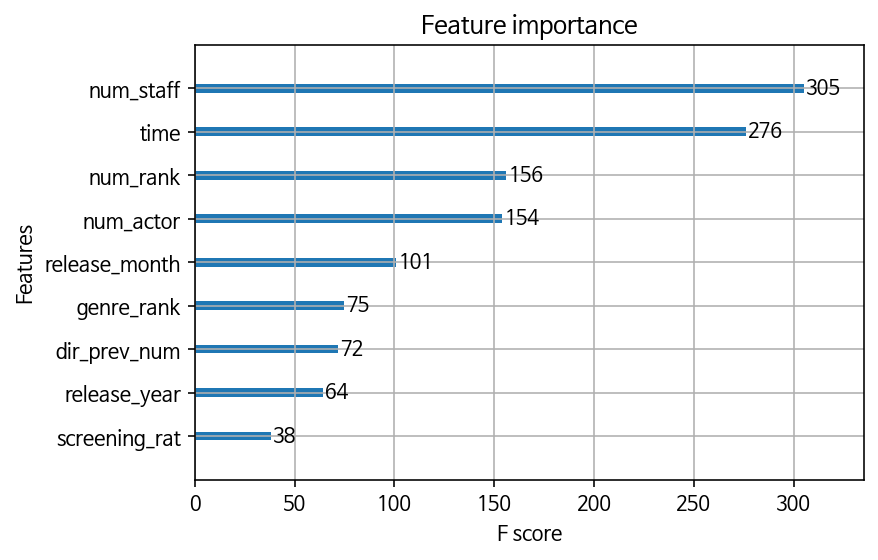

In [ ]:
xgb.plot_importance(xgb_reg)

## 하이퍼파라미터 튜닝 - optuna

In [ ]:
# Optuna Libraries
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [ ]:
# random sampler
sampler = TPESampler(seed=10)

# define function
def objective(trial):

    param = {
        'objective': 'reg:squarederror',
        'verbose': -1,
        'metric': 'mse', 
        'num_leaves': trial.suggest_int('num_leaves', 2, 1024, step=1, log=True), 
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 10.0),
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.0001, 0.99),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 15),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    # Generate model
    model_xgb = XGBRegressor(**param)
    model_xgb = model_xgb.fit(train_x, train_y, eval_set=[(val_x, val_y)], 
                           verbose=0, early_stopping_rounds=25)
                           
    # * 평가 지표
    # 원하는 평가 지표에 따라 사용하기                        
    MSE = mean_squared_error(val_y, model_xgb.predict(val_x))
    return MSE

optuna_xgb = optuna.create_study(direction='minimize', sampler=sampler)

# * n_trials의 경우 optuna를 몇번 실행하여 hyper parameter를 찾을 것인지를 정한다.
# 50으로 설정해도 유의미한 값이 나온다.
optuna_xgb.optimize(objective, n_trials=100)

[I 2022-12-06 01:27:18,431] A new study created in memory with name: no-name-ff55cb2c-a0ec-4bb5-bebb-6d64bc8f92a0
[I 2022-12-06 01:27:19,290] Trial 0 finished with value: 1165390367237.9963 and parameters: {'num_leaves': 230, 'colsample_bytree': 0.7062255848078204, 'reg_alpha': 0.6336482349262754, 'reg_lambda': 7.488038825386118, 'max_depth': 9, 'learning_rate': 0.0007910526477470923, 'n_estimators': 674, 'min_child_weight': 12, 'subsample': 0.46704202331689854}. Best is trial 0 with value: 1165390367237.9963.
[I 2022-12-06 01:27:19,358] Trial 1 finished with value: 916439700661.2504 and parameters: {'num_leaves': 3, 'colsample_bytree': 0.9056079455103392, 'reg_alpha': 0.9533933461949365, 'reg_lambda': 0.039482663279144514, 'max_depth': 9, 'learning_rate': 0.17657813040997375, 'n_estimators': 1876, 'min_child_weight': 12, 'subsample': 0.5226478358414336}. Best is trial 1 with value: 916439700661.2504.
[I 2022-12-06 01:27:19,452] Trial 2 finished with value: 956628907187.5977 and parame

In [ ]:
xgb_trial = optuna_xgb.best_trial
xgb_trial_params = xgb_trial.params
print('Best Trial: score {},\nparams {}'.format(xgb_trial.value, xgb_trial_params))

Best Trial: score 784209441995.1047,
params {'num_leaves': 142, 'colsample_bytree': 0.7302814997675352, 'reg_alpha': 0.8333607070909262, 'reg_lambda': 1.0610264040177986, 'max_depth': 6, 'learning_rate': 0.2534164473387006, 'n_estimators': 521, 'min_child_weight': 14, 'subsample': 0.6918469731857935}


In [ ]:
# Modeling fit
xgb_regop = XGBRegressor(**xgb_trial_params)
xgb_study = xgb_regop.fit(train_x, train_y)

xgb_pred_op = xgb_regop.predict(val_x)
mse= mean_squared_error(val_y,xgb_pred_op)
rmse= mse**(1/2)

print("RMSE : ", rmse)

[01:28:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1553630.8051209091


# 제출

In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,release_year,release_month,dis_rank,genre_rank
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,3,김형준,2,304,3,2010,1,132.0,12
1,아빠가 여자를 좋아해,쇼박스,멜로/로맨스,2010-01-14,113,0,이광재,4,275,3,2010,1,145.0,5
2,하모니,CJ,드라마,2010-01-28,115,0,강대규,3,419,7,2010,1,141.0,8
3,의형제,쇼박스,액션,2010-02-04,116,1,장훈,2,408,2,2010,2,145.0,11
4,평행 이론,CJ,공포,2010-02-18,110,1,권호영,1,380,1,2010,2,141.0,7


In [ ]:
test.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_num      0
num_staff         0
num_actor         0
release_year      0
release_month     0
dis_rank         31
genre_rank        0
dtype: int64

In [ ]:
test.fillna(0,inplace=True)
test.isnull().sum()

title            0
distributor      0
genre            0
release_time     0
time             0
screening_rat    0
director         0
dir_prev_num     0
num_staff        0
num_actor        0
release_year     0
release_month    0
dis_rank         0
genre_rank       0
dtype: int64

In [ ]:
rf_pred = rf_regop.predict(test.drop(['title','release_time','director','genre','distributor'],axis=1))
cat_pred = cat_regop.predict(test.drop(['title','release_time','director','genre','distributor'],axis=1))
xgb_pred = xgb_regop.predict(test.drop(['title','release_time','director','genre','distributor'],axis=1))

In [ ]:
submission=pd.read_csv('submission.csv')
submission['box_off_num'] =(rf_pred +cat_pred+xgb_pred)/3

In [ ]:
submission.to_csv('sub_cat_rf_xgb.csv',index=False)

# 4.결론

스코어 기준: RMSE

1. 22.11.28 제출 스코어: 1414279.2914 
* 사용모델: RandomForestRegressor
* 전처리: feature engineering, feature selection
* 하이퍼파라미터튜닝: optuna

2. 22.12.05 제출 스코어: 1333624.76056
* 사용모델 : RandomForestRegressor, CatboostRegressor
* 전처리: feature engineering, feature selection, label encoding
* 하이퍼파라미터튜닝: optuna

3. 22.12.06 제출 스코어: 1295215.34616
* 사용모델: RandomForestRegressor, CatboostRegressor, XGBoostRegressor
* 전처리: feature engineering, feature selection, label encoding
* 하이퍼파라미터 튜닝: optuna

### 발전 방향
* 수치데이터 로그화
* k fold 교차검증
* 더 많은 모델 사용